In [604]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sweetviz as sv
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [605]:
df=pd.read_csv('./Loan_Default.csv')
df.head()

ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP           758                       CIB  25-34   
1         EQUI           552                       EXP  55-64   
2          EXP           834                       CIB  35-44   
3          EXP           587                       CIB  45-54   
4         CRIF           602                       EXP  25-34   

   submission_of_application        LTV Region Security_Type  Status dtir1  
0                    to_inst  98.728814  south        direct       1  45.0  
1                    to_inst        NaN  North        direct       1   NaN  
2                    to_inst  80.019685  south        direct       0  46.0  
3                   not_inst  69.376900  North        direct       0  42.0  
4                   not_inst  91.886544  North        direct       0  39.0  

[5 rows x 34 columns]

In [606]:
df.tail()

ID  year loan_limit             Gender approv_in_adv loan_type  \
148665  173555  2019         cf  Sex Not Available         nopre     type1   
148666  173556  2019         cf               Male         nopre     type1   
148667  173557  2019         cf               Male         nopre     type1   
148668  173558  2019         cf             Female         nopre     type1   
148669  173559  2019         cf             Female         nopre     type1   

       loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
148665           p3                l1        nopc                  nob/c  ...   
148666           p1                l1        nopc                  nob/c  ...   
148667           p4                l1        nopc                  nob/c  ...   
148668           p4                l1        nopc                  nob/c  ...   
148669           p3                l1        nopc                  nob/c  ...   

        credit_type  Credit_Score  co-applicant_credit_type    age  \
148665          CIB           659                       EXP  55-64   
148666          CIB           569                       CIB  25-34   
148667          CIB           702                       EXP  45-54   
148668          EXP           737                       EXP  55-64   
148669          CIB           830                       CIB  45-54   

        submission_of_application        LTV Region Security_Type  Status  \
148665                    to_inst  71.792763  south        direct       0   
148666                   not_inst  74.428934  south        direct       0   
148667                   not_inst  61.332418  North        direct       0   
148668                    to_inst  70.683453  North        direct       0   
148669                   not_inst  72.849462  North        direct       0   

       dtir1  
148665  48.0  
148666  15.0  
148667  49.0  
148668  29.0  
148669  44.0  

[5 rows x 34 columns]

In [607]:
df.shape

(148670, 34)

In [608]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [609]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [610]:
df.dtypes

ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
a

In [611]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [612]:
df.duplicated().sum()

0

In [613]:
categorical_features=['loan_limit','Gender','approv_in_adv','loan_type','loan_purpose','Credit_Worthiness',
                     'open_credit','business_or_commercial','Neg_ammortization','interest_only','lump_sum_payment',
                     'construction_type','occupancy_type','Secured_by','total_units','credit_type','co-applicant_credit_type',
                     'age','submission_of_application','Region','Security_Type']

In [614]:
numeric_features=['loan_amount','rate_of_interest','Interest_rate_spread','Upfront_charges','term','property_value',
                'income','Credit_Score','LTV','dtir1']

In [615]:
target=['Status']

In [616]:
numeric_features_with_target=['loan_amount','rate_of_interest','Interest_rate_spread','Upfront_charges','term','property_value',
                'income','Credit_Score','LTV','dtir1','Status']

In [617]:
df[numeric_features_with_target].describe()

loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
count  1.486700e+05     112231.000000         112031.000000    109028.000000   
mean   3.311177e+05          4.045476              0.441656      3224.996127   
std    1.839093e+05          0.561391              0.513043      3251.121510   
min    1.650000e+04          0.000000             -3.638000         0.000000   
25%    1.965000e+05          3.625000              0.076000       581.490000   
50%    2.965000e+05          3.990000              0.390400      2596.450000   
75%    4.365000e+05          4.375000              0.775400      4812.500000   
max    3.576500e+06          8.000000              3.357000     60000.000000   

                term  property_value         income   Credit_Score  \
count  148629.000000    1.335720e+05  139520.000000  148670.000000   
mean      335.136582    4.978935e+05    6957.338876     699.789103   
std        58.409084    3.599353e+05    6496.586382     115.875857   
min        96.000000    8.000000e+03       0.000000     500.000000   
25%       360.000000    2.680000e+05    3720.000000     599.000000   
50%       360.000000    4.180000e+05    5760.000000     699.000000   
75%       360.000000    6.280000e+05    8520.000000     800.000000   
max       360.000000    1.650800e+07  578580.000000     900.000000   

                 LTV          dtir1         Status  
count  133572.000000  124549.000000  148670.000000  
mean       72.746457      37.732932       0.246445  
std        39.967603      10.545435       0.430942  
min         0.967478       5.000000       0.000000  
25%        60.474860      31.000000       0.000000  
50%        75.135870      39.000000       0.000000  
75%        86.184211      45.000000       0.000000  
max      7831.250000      61.000000       1.000000

In [618]:
df[numeric_features_with_target].groupby('Status').mean()

loan_amount  rate_of_interest  Interest_rate_spread  \
Status                                                          
0       334990.774875          4.044931              0.441656   
1       319275.184912          4.350500                   NaN   

        Upfront_charges        term  property_value       income  \
Status                                                             
0           3227.328554  335.144592   505606.066286  7204.014214   
1           1565.237974  335.112085   457786.009377  6231.806780   

        Credit_Score        LTV      dtir1  
Status                                      
0         699.523793  72.064757  37.369267  
1         700.600344  76.291468  39.597324

In [619]:
df.skew(numeric_only=True)

ID                        0.000000
year                      0.000000
loan_amount               1.666998
rate_of_interest          0.388406
Interest_rate_spread      0.280762
Upfront_charges           1.754076
term                     -2.174822
property_value            4.586276
income                   17.307695
Credit_Score              0.004767
LTV                     120.615337
Status                    1.176762
dtir1                    -0.551465
dtype: float64

In [620]:
for column in df.columns:
    if df[column].nunique()==1:
        print(f'{column}:{df[column].unique()}')

year:[2019]


In [621]:
df.drop(['ID','year'],axis='columns',inplace=True)

In [622]:
df.head()

loan_limit             Gender approv_in_adv loan_type loan_purpose  \
0         cf  Sex Not Available         nopre     type1           p1   
1         cf               Male         nopre     type2           p1   
2         cf               Male           pre     type1           p1   
3         cf               Male         nopre     type1           p4   
4         cf              Joint           pre     type1           p1   

  Credit_Worthiness open_credit business_or_commercial  loan_amount  \
0                l1        nopc                  nob/c       116500   
1                l1        nopc                    b/c       206500   
2                l1        nopc                  nob/c       406500   
3                l1        nopc                  nob/c       456500   
4                l1        nopc                  nob/c       696500   

   rate_of_interest  ...  credit_type  Credit_Score  co-applicant_credit_type  \
0               NaN  ...          EXP           758                       CIB   
1               NaN  ...         EQUI           552                       EXP   
2              4.56  ...          EXP           834                       CIB   
3              4.25  ...          EXP           587                       CIB   
4              4.00  ...         CRIF           602                       EXP   

     age submission_of_application        LTV  Region Security_Type Status  \
0  25-34                   to_inst  98.728814   south        direct      1   
1  55-64                   to_inst        NaN   North        direct      1   
2  35-44                   to_inst  80.019685   south        direct      0   
3  45-54                  not_inst  69.376900   North        direct      0   
4  25-34                  not_inst  91.886544   North        direct      0   

  dtir1  
0  45.0  
1   NaN  
2  46.0  
3  42.0  
4  39.0  

[5 rows x 32 columns]

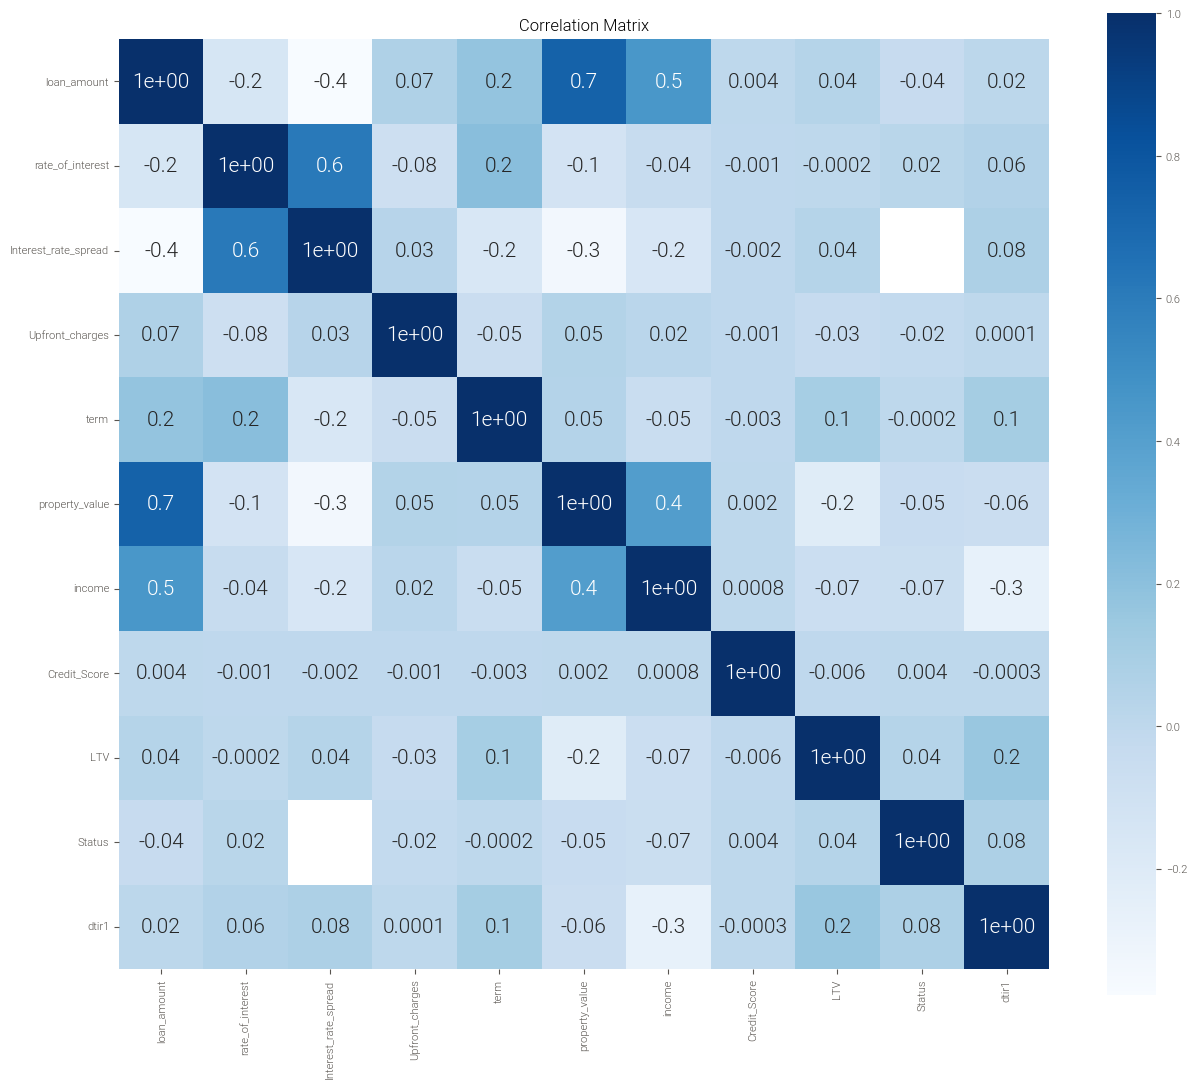

In [623]:
correlation_matrix=df.corr(numeric_only=True)
plt.figure(figsize=(15,13))
sns.heatmap(correlation_matrix,annot=True,square=True,cbar='True',annot_kws={'size':15},fmt='.1',cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

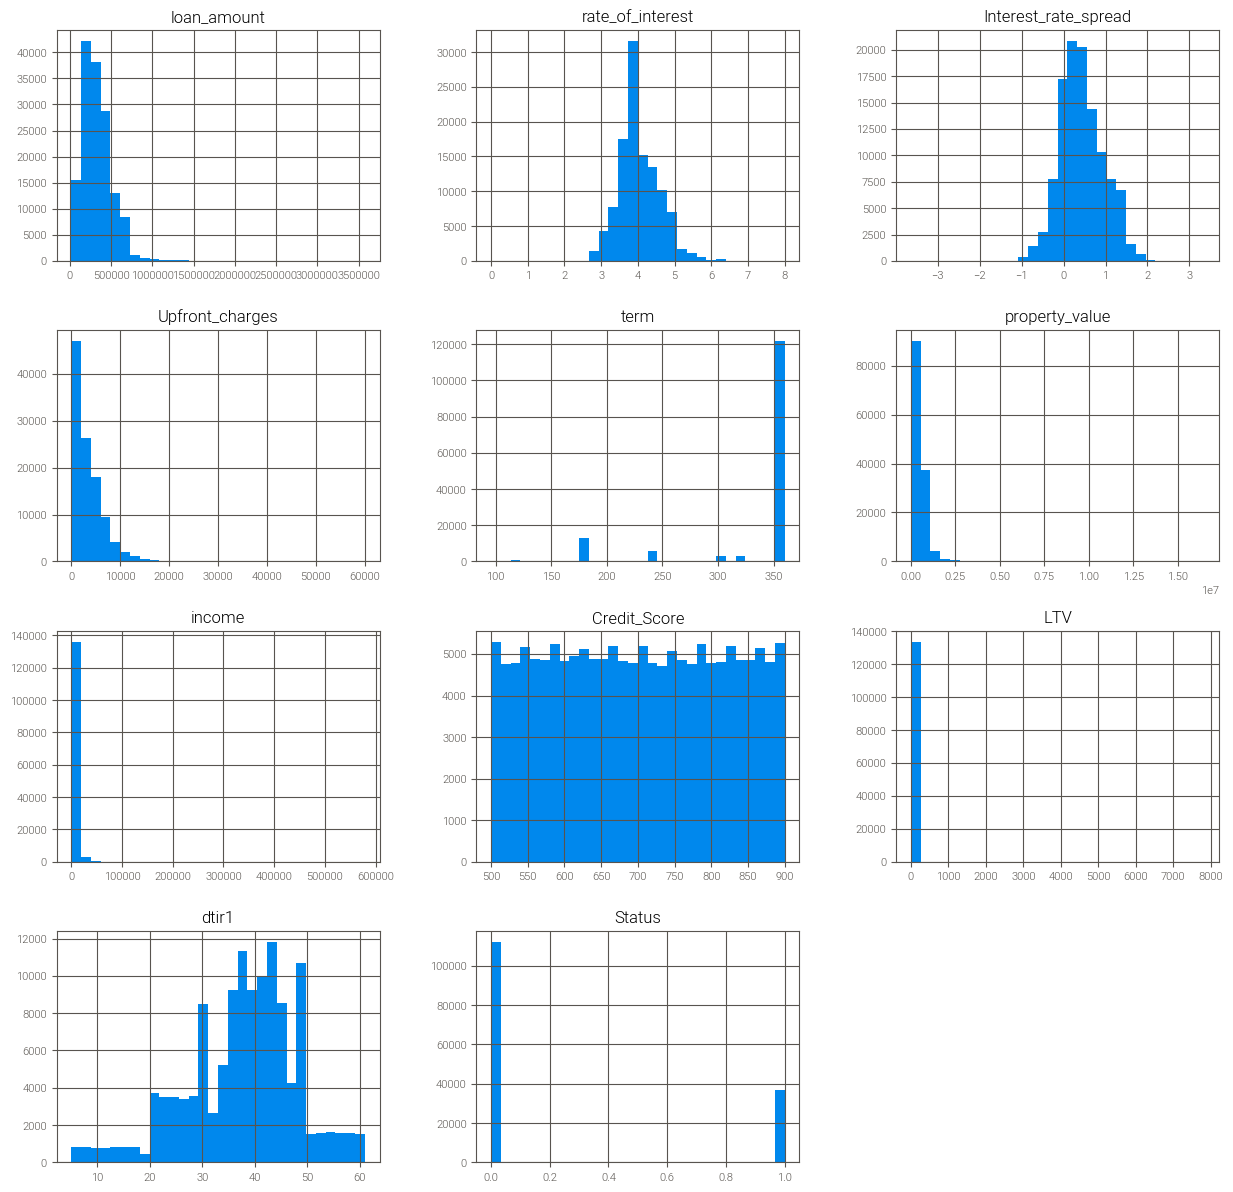

In [624]:
df[numeric_features_with_target].hist(bins=30,figsize=(15,15))
plt.show()

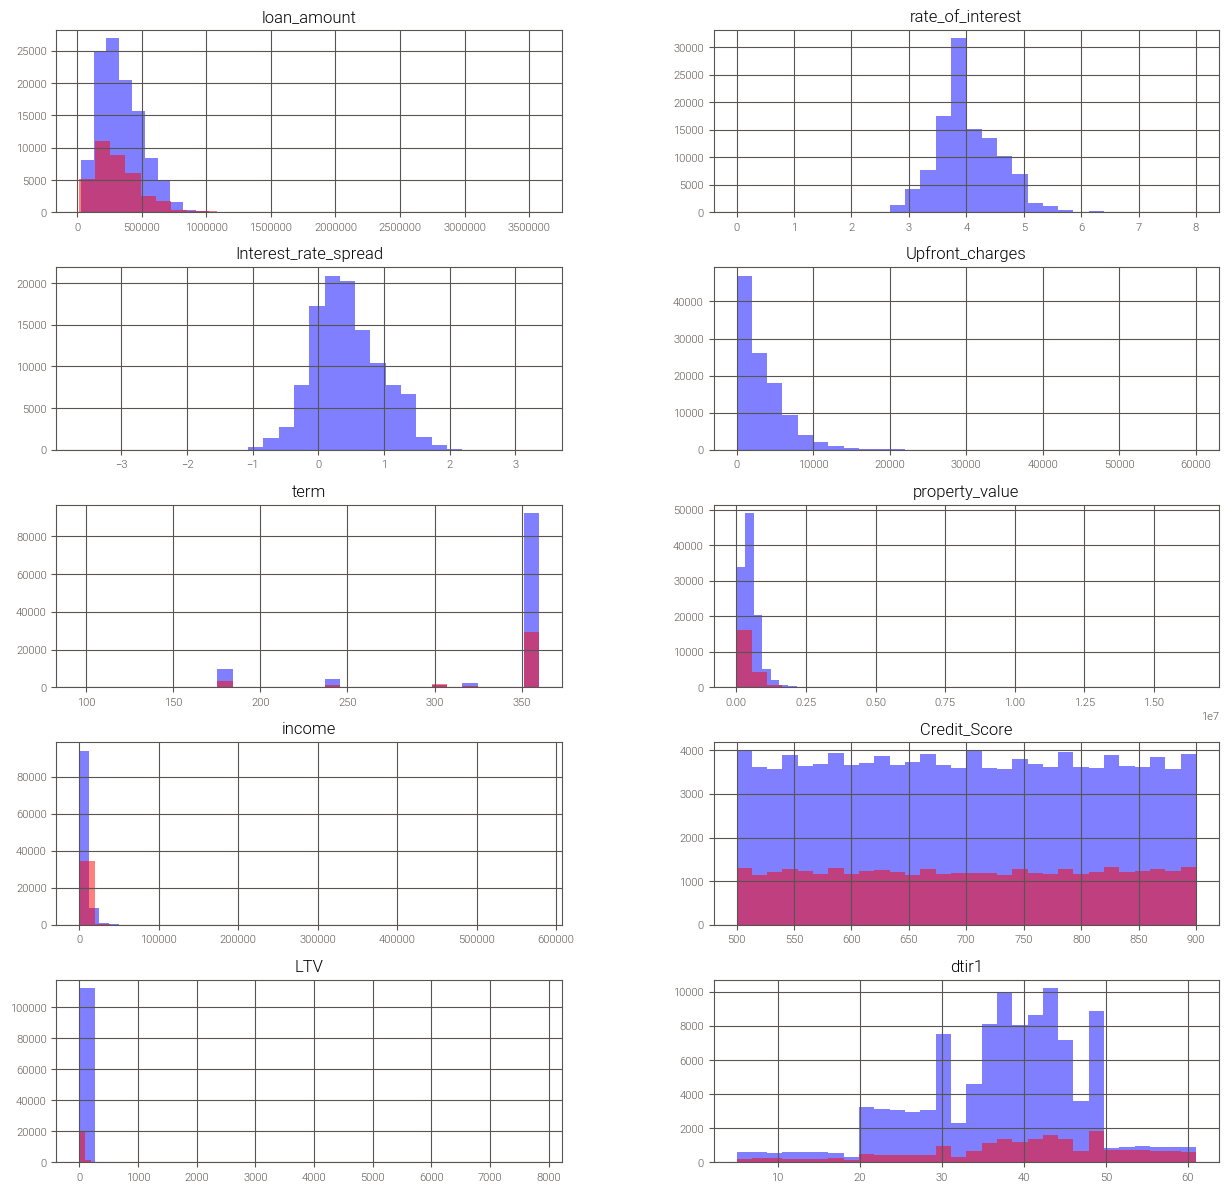

In [625]:
fig,ax=plt.subplots(5,2,figsize=(15,15))
df[df['Status']==0][numeric_features].hist(bins=30,color='blue',alpha=0.5,ax=ax)
df[df['Status']==1][numeric_features].hist(bins=30,color='red',alpha=0.5,ax=ax)
plt.show()

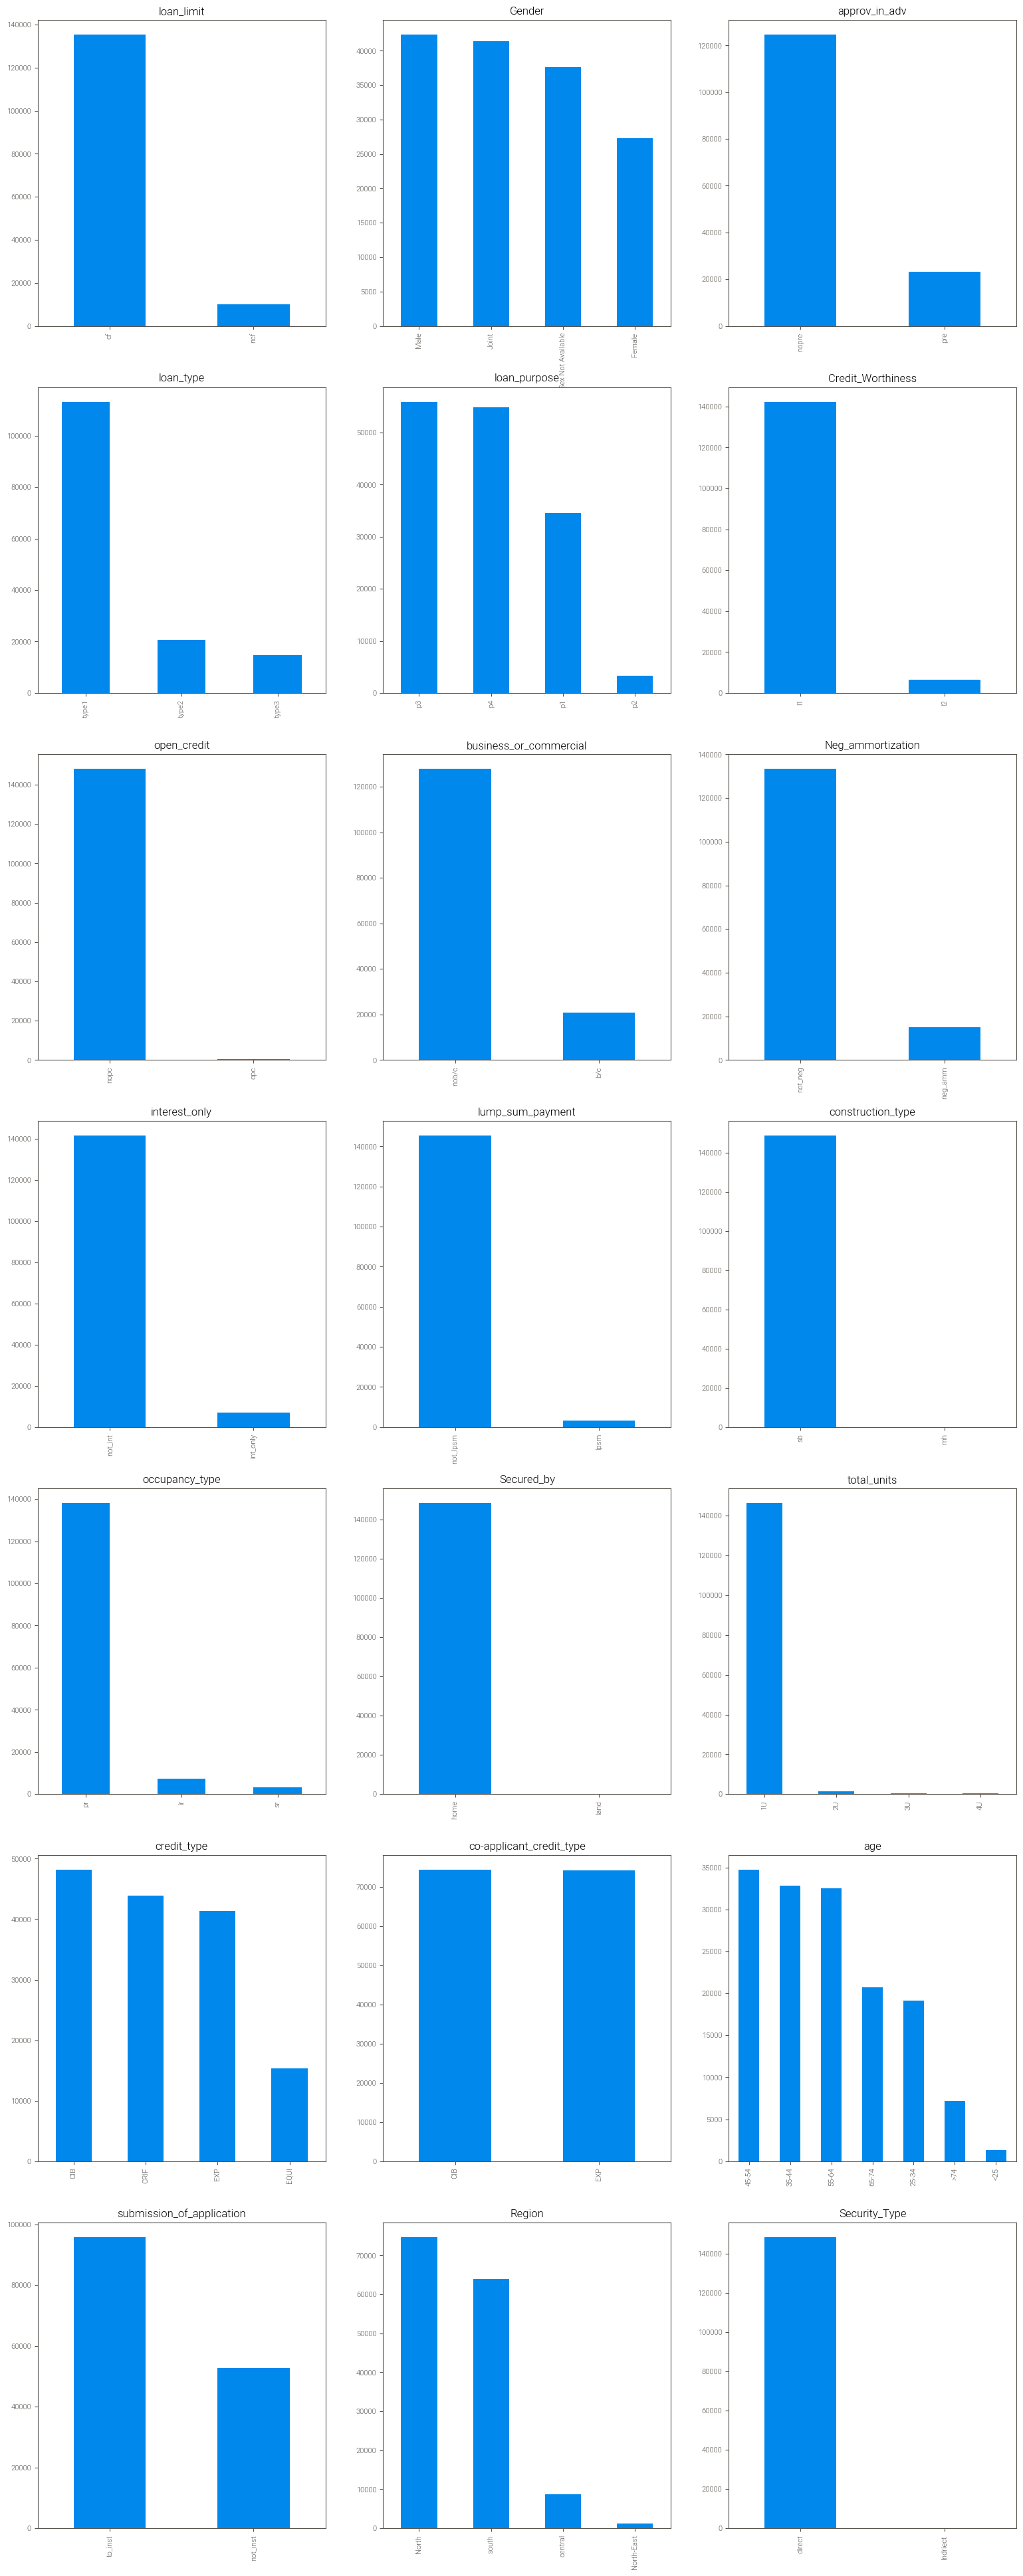

In [626]:
ROWS,COLS=7,3
fig,ax=plt.subplots(ROWS,COLS,figsize=(19,50))
row,col=0,0
for i,categorical_feature in enumerate(categorical_features):
    if col==COLS-1:
        row+=1
    col=i%COLS
    df[categorical_feature].value_counts().plot(kind='bar',ax=ax[row,col]).set_title(categorical_feature)

In [627]:
df['open_credit'].value_counts()

nopc    148114
opc        556
Name: open_credit, dtype: int64

In [628]:
df['construction_type'].value_counts()

sb    148637
mh        33
Name: construction_type, dtype: int64

In [629]:
df['Secured_by'].value_counts()

home    148637
land        33
Name: Secured_by, dtype: int64

In [630]:
df['total_units'].value_counts()

1U    146480
2U      1477
3U       393
4U       320
Name: total_units, dtype: int64

In [631]:
df['Security_Type'].value_counts()

direct      148637
Indriect        33
Name: Security_Type, dtype: int64

In [632]:
df.drop(['open_credit','construction_type','Secured_by','total_units','Security_Type'],axis=1,inplace=True)

In [633]:
df.head()

loan_limit             Gender approv_in_adv loan_type loan_purpose  \
0         cf  Sex Not Available         nopre     type1           p1   
1         cf               Male         nopre     type2           p1   
2         cf               Male           pre     type1           p1   
3         cf               Male         nopre     type1           p4   
4         cf              Joint           pre     type1           p1   

  Credit_Worthiness business_or_commercial  loan_amount  rate_of_interest  \
0                l1                  nob/c       116500               NaN   
1                l1                    b/c       206500               NaN   
2                l1                  nob/c       406500              4.56   
3                l1                  nob/c       456500              4.25   
4                l1                  nob/c       696500              4.00   

   Interest_rate_spread  ...   income  credit_type Credit_Score  \
0                   NaN  ...   1740.0          EXP          758   
1                   NaN  ...   4980.0         EQUI          552   
2                0.2000  ...   9480.0          EXP          834   
3                0.6810  ...  11880.0          EXP          587   
4                0.3042  ...  10440.0         CRIF          602   

  co-applicant_credit_type    age  submission_of_application        LTV  \
0                      CIB  25-34                    to_inst  98.728814   
1                      EXP  55-64                    to_inst        NaN   
2                      CIB  35-44                    to_inst  80.019685   
3                      CIB  45-54                   not_inst  69.376900   
4                      EXP  25-34                   not_inst  91.886544   

   Region Status  dtir1  
0   south      1   45.0  
1   North      1    NaN  
2   south      0   46.0  
3   North      0   42.0  
4   North      0   39.0  

[5 rows x 27 columns]

In [634]:
df.shape

(148670, 27)

In [635]:
categorical_features_up=['loan_limit','Gender','approv_in_adv','loan_type','loan_purpose','Credit_Worthiness',
                     'business_or_commercial','Neg_ammortization','interest_only','lump_sum_payment',
                     'occupancy_type','credit_type','co-applicant_credit_type',
                     'age','submission_of_application','Region']

In [636]:
def valuecountplot(feature_name):
    fig,ax=plt.subplots(1,2,figsize=(19,7))
    df[df['Status']==0][feature_name].value_counts().plot(kind='bar',ax=ax[0]).set_title('Not Loan Default')
    df[df['Status']==1][feature_name].value_counts().plot(kind='bar',ax=ax[1]).set_title('Loan Default')
    plt.ylabel(feature_name)

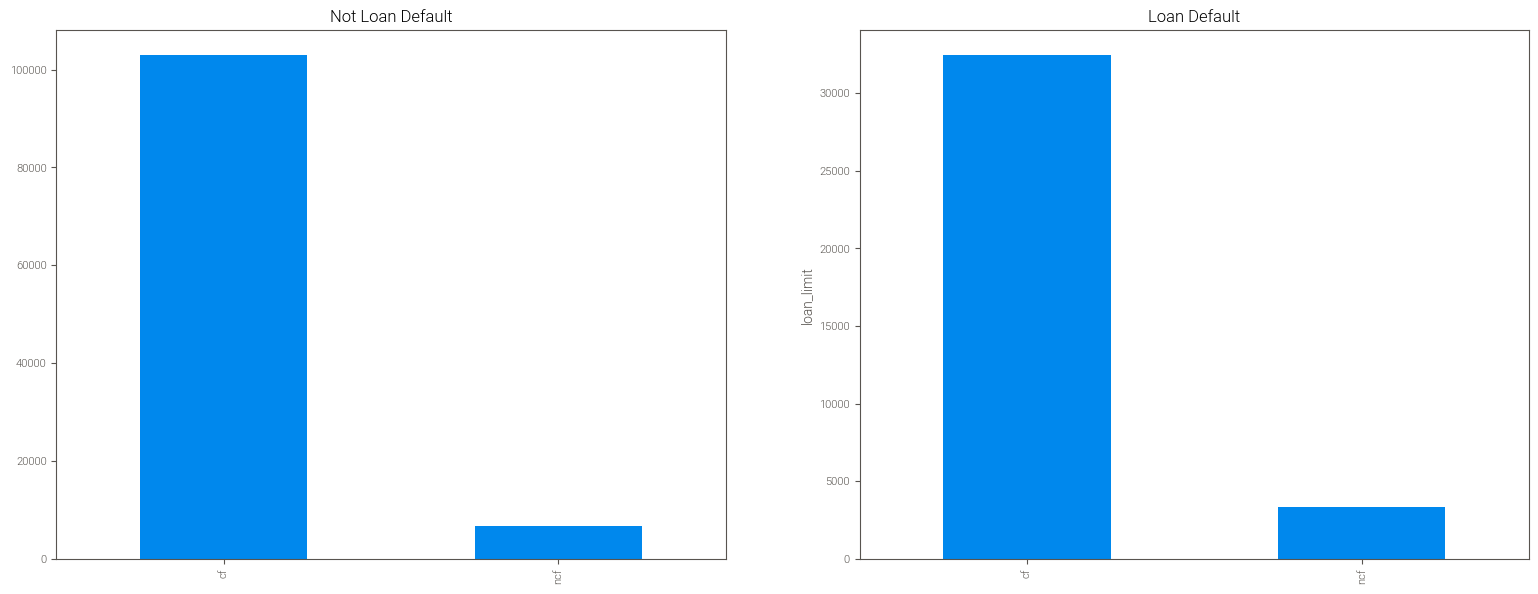

In [637]:
valuecountplot('loan_limit')

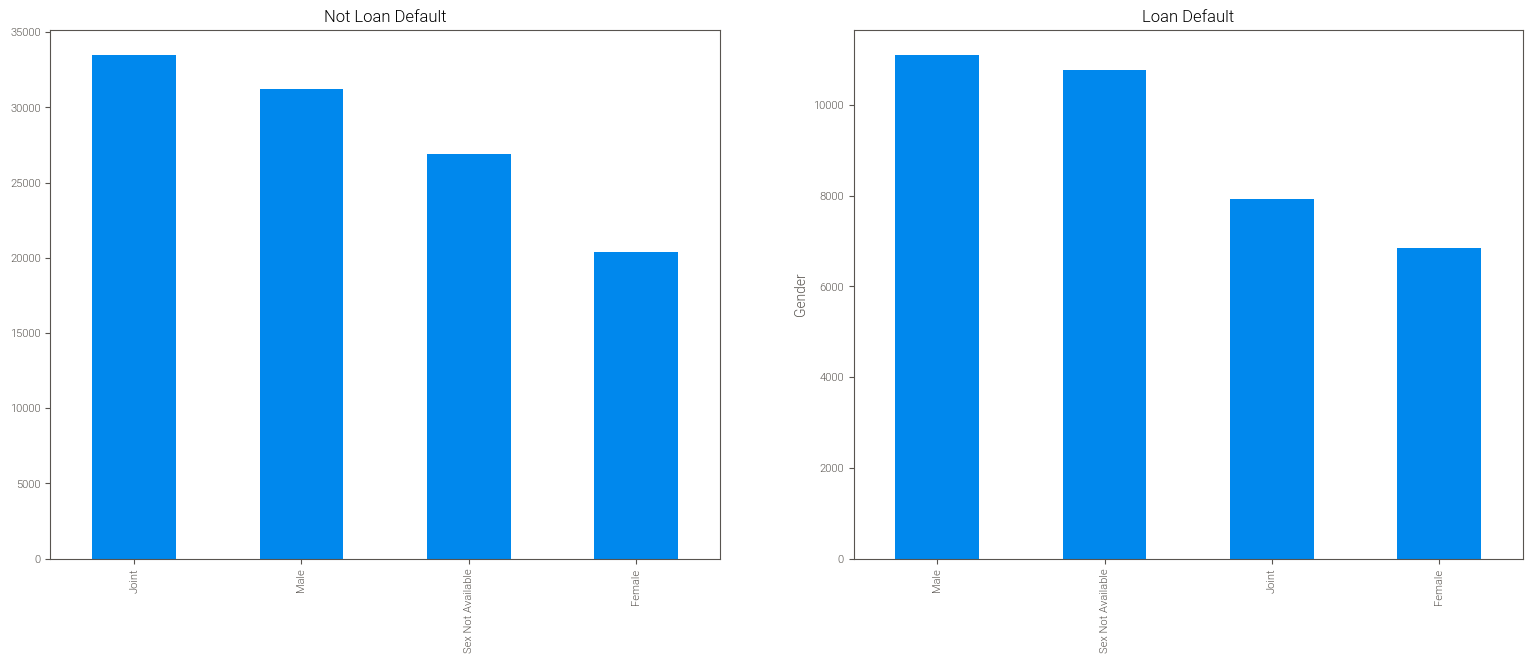

In [638]:
valuecountplot('Gender')

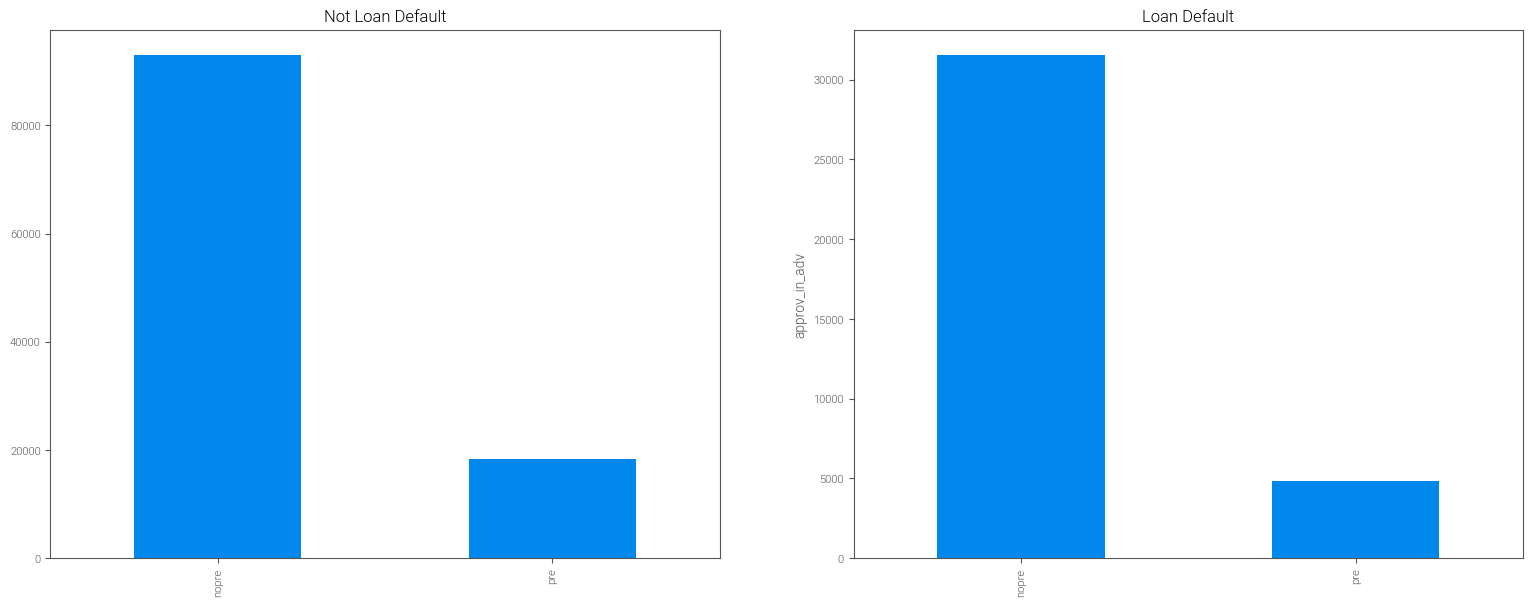

In [639]:
valuecountplot('approv_in_adv')

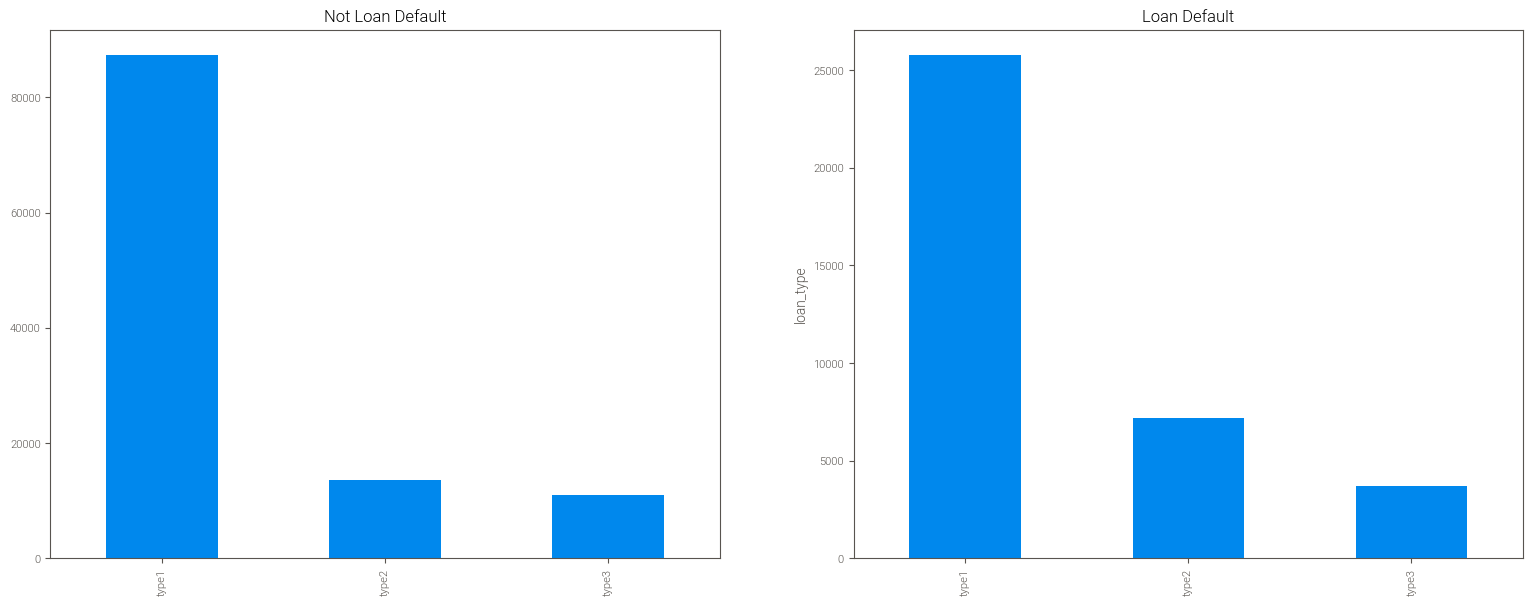

In [640]:
valuecountplot('loan_type')

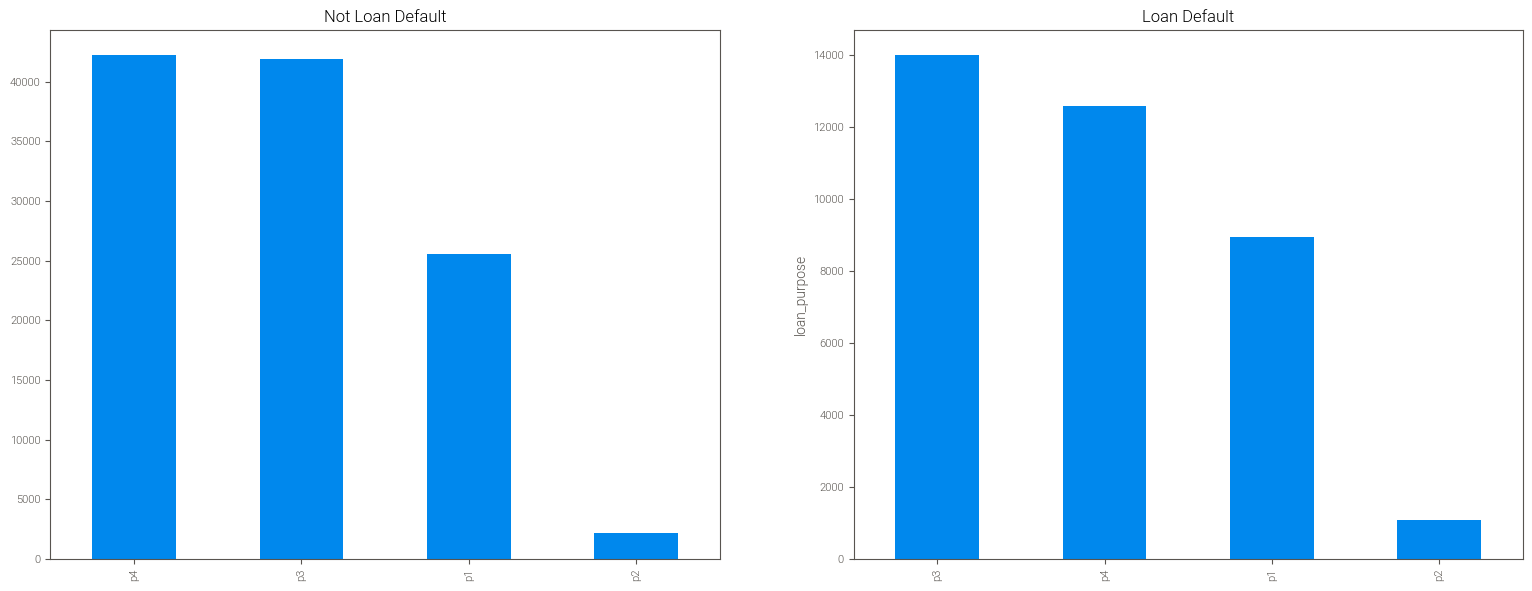

In [641]:
valuecountplot('loan_purpose')

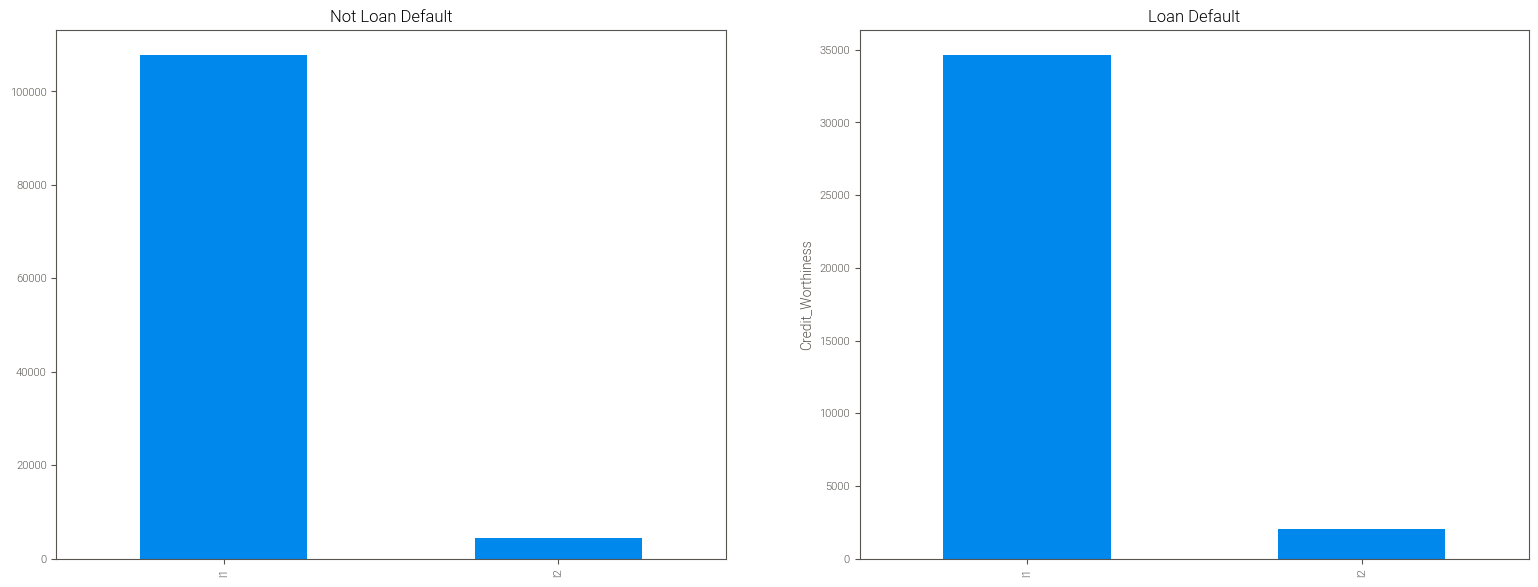

In [642]:
valuecountplot('Credit_Worthiness')

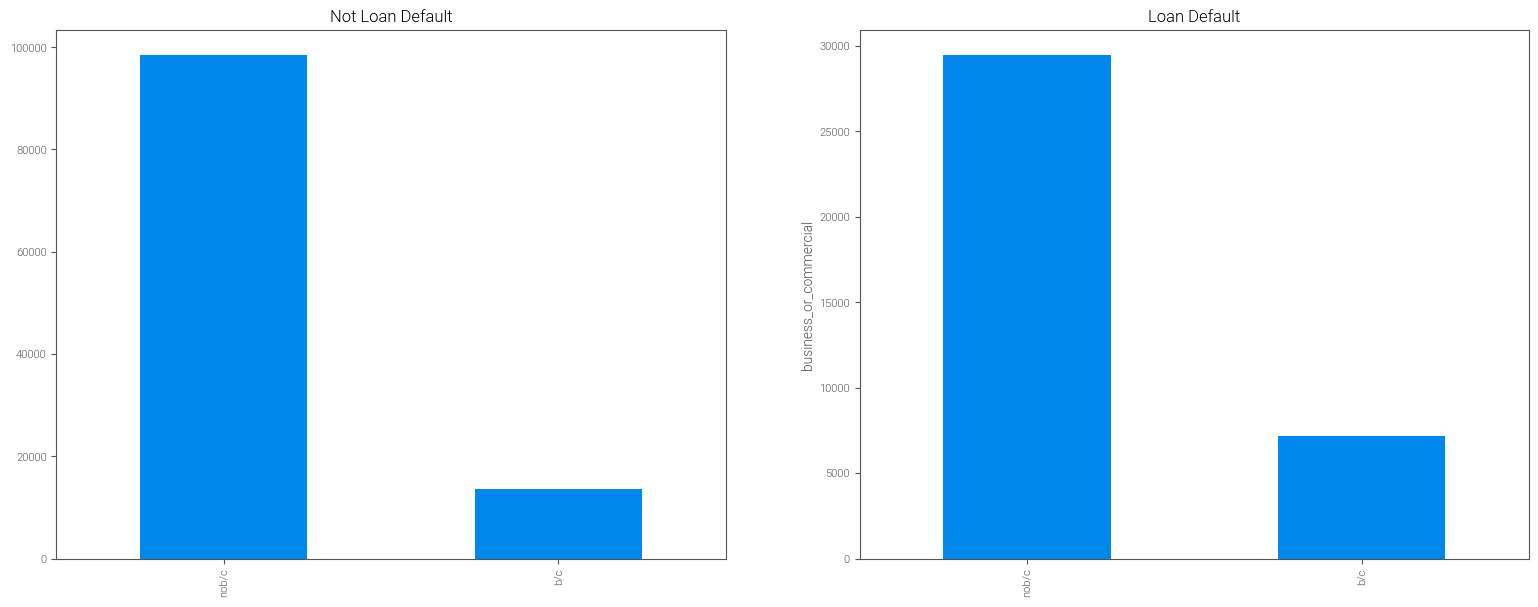

In [643]:
valuecountplot('business_or_commercial')

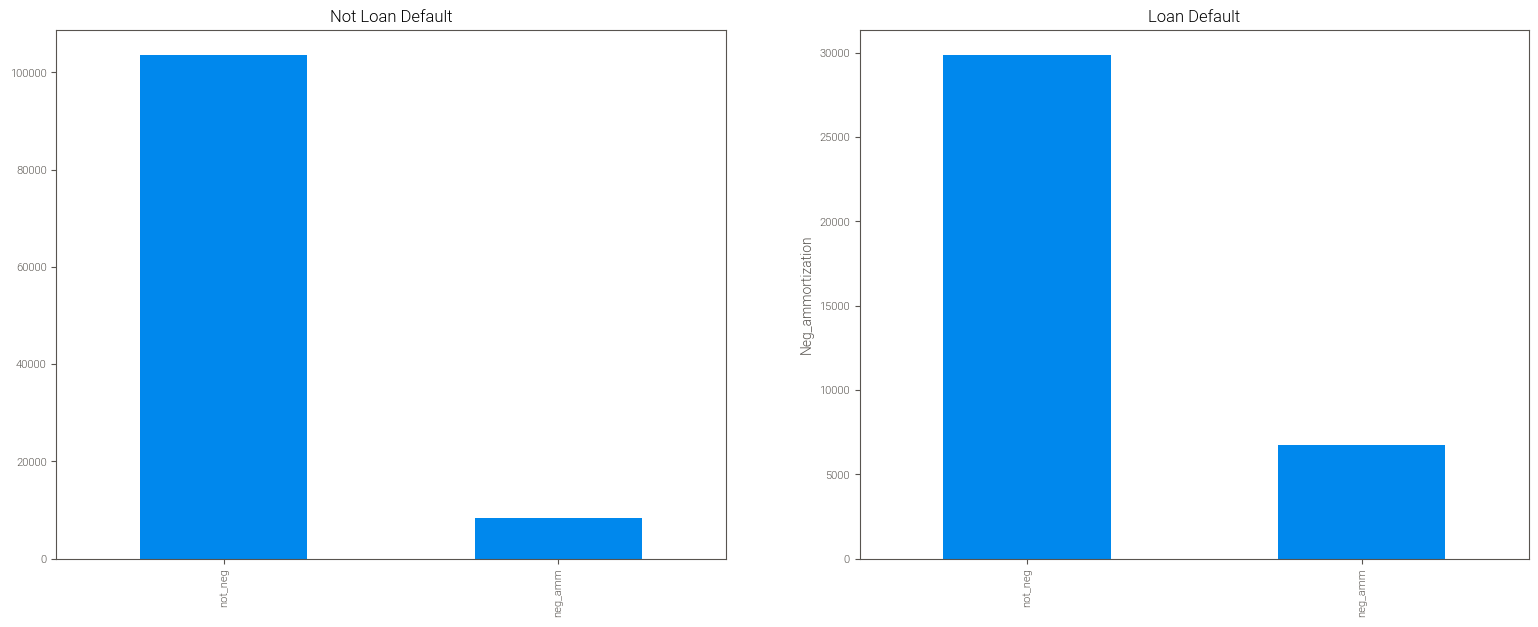

In [644]:
valuecountplot('Neg_ammortization')

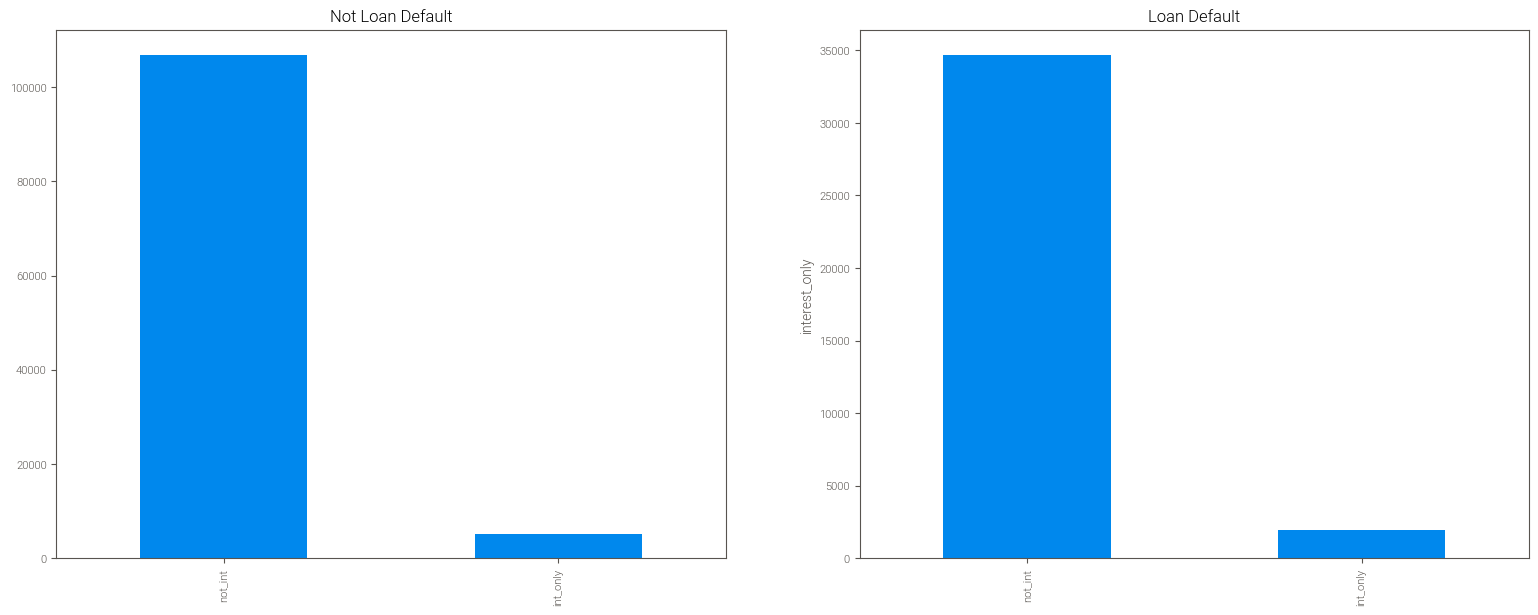

In [645]:
valuecountplot('interest_only')

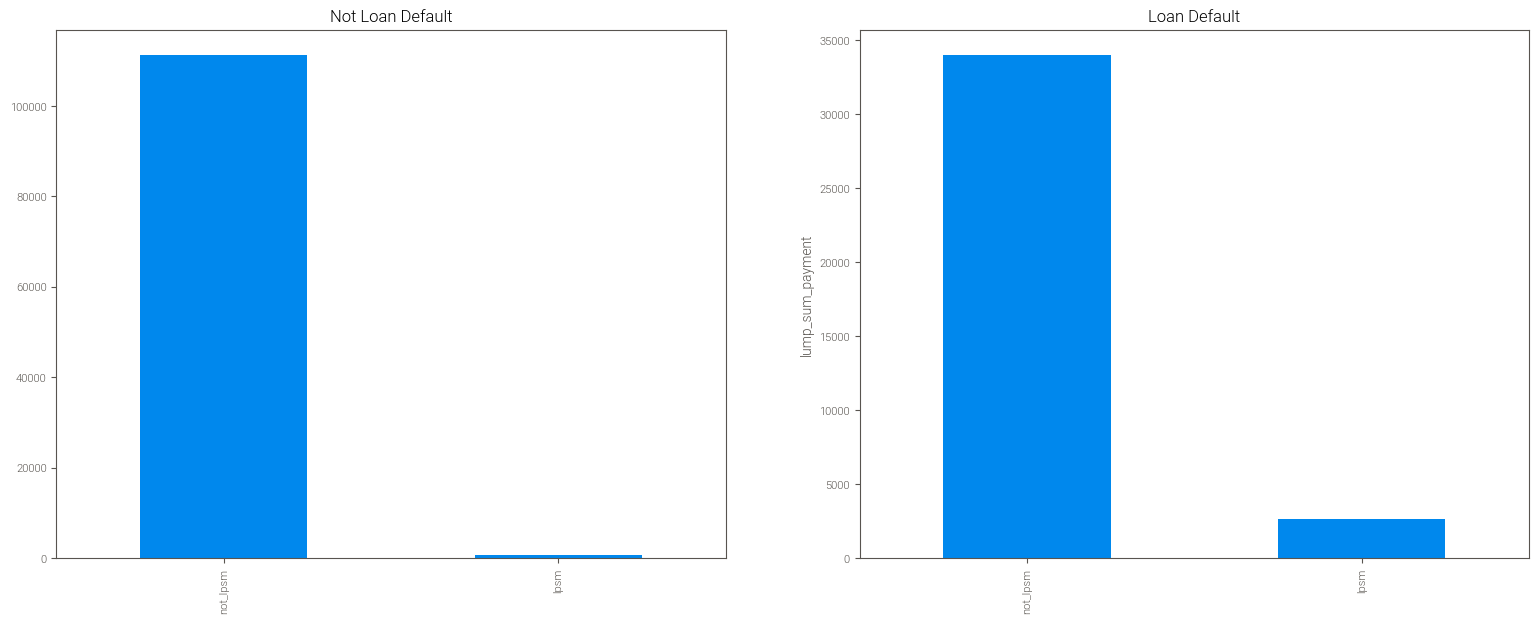

In [646]:
valuecountplot('lump_sum_payment')

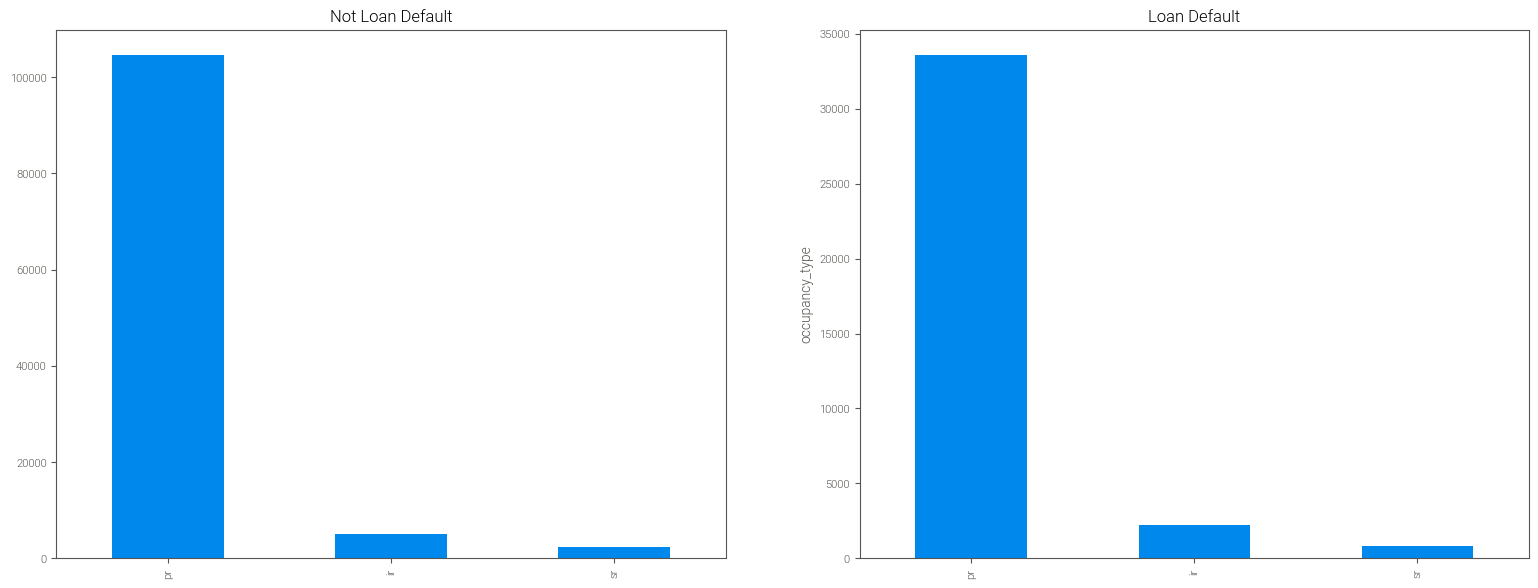

In [647]:
valuecountplot('occupancy_type')

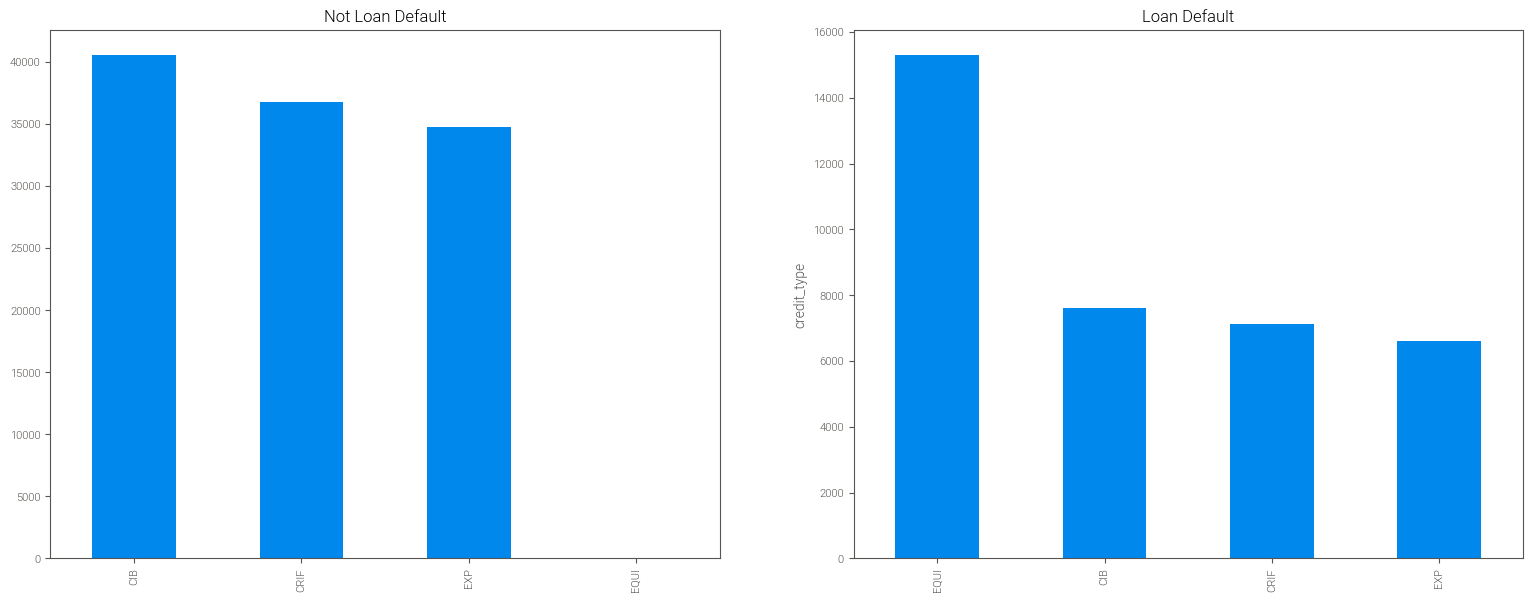

In [648]:
valuecountplot('credit_type')

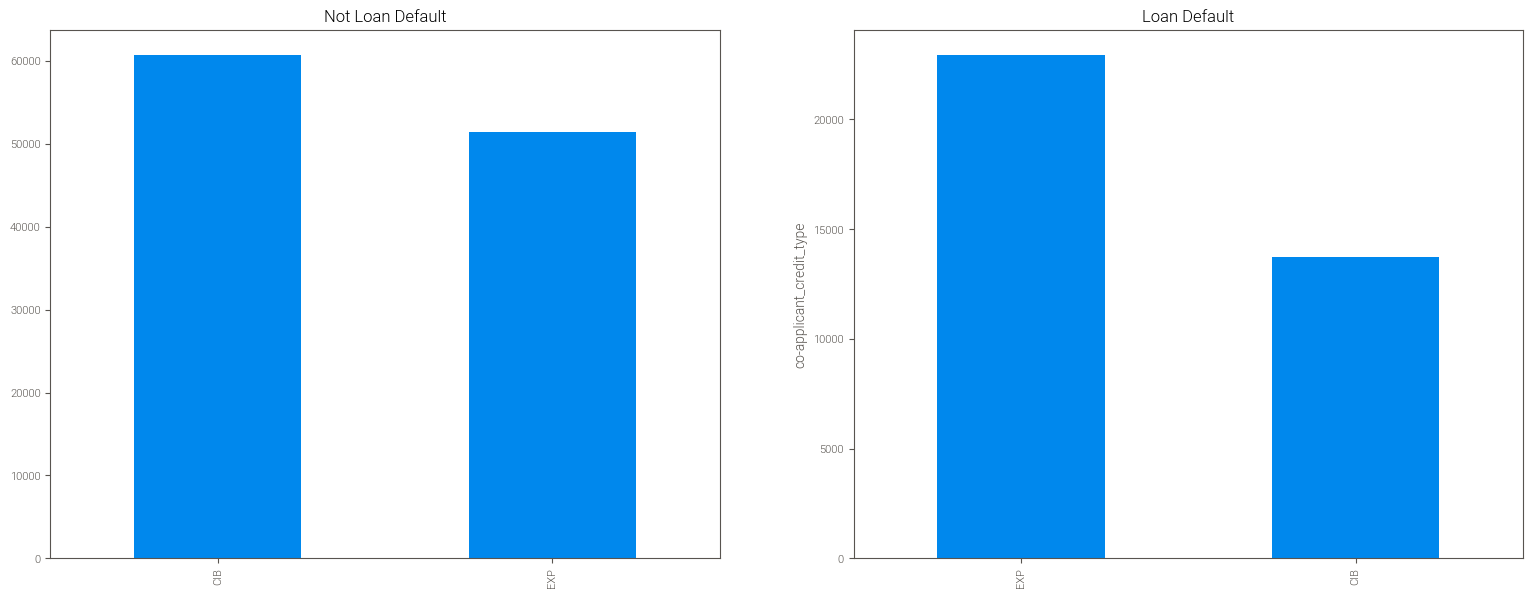

In [649]:
valuecountplot('co-applicant_credit_type')

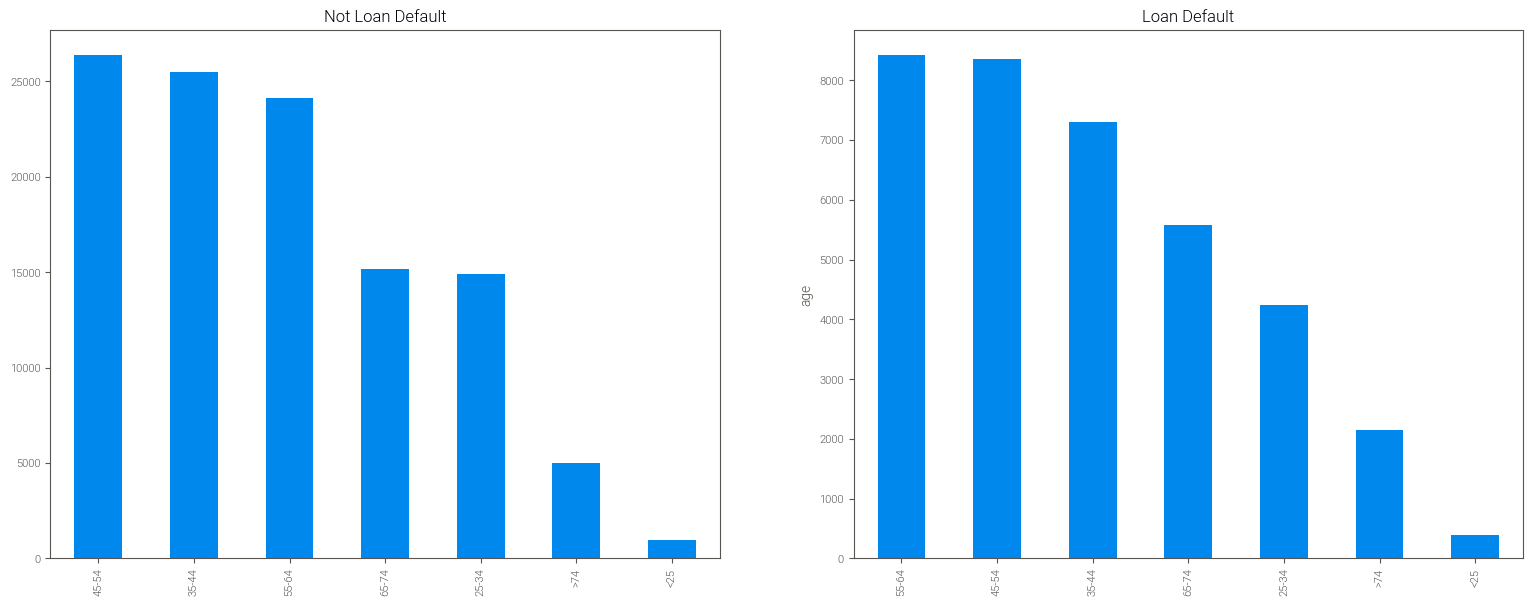

In [650]:
valuecountplot('age')

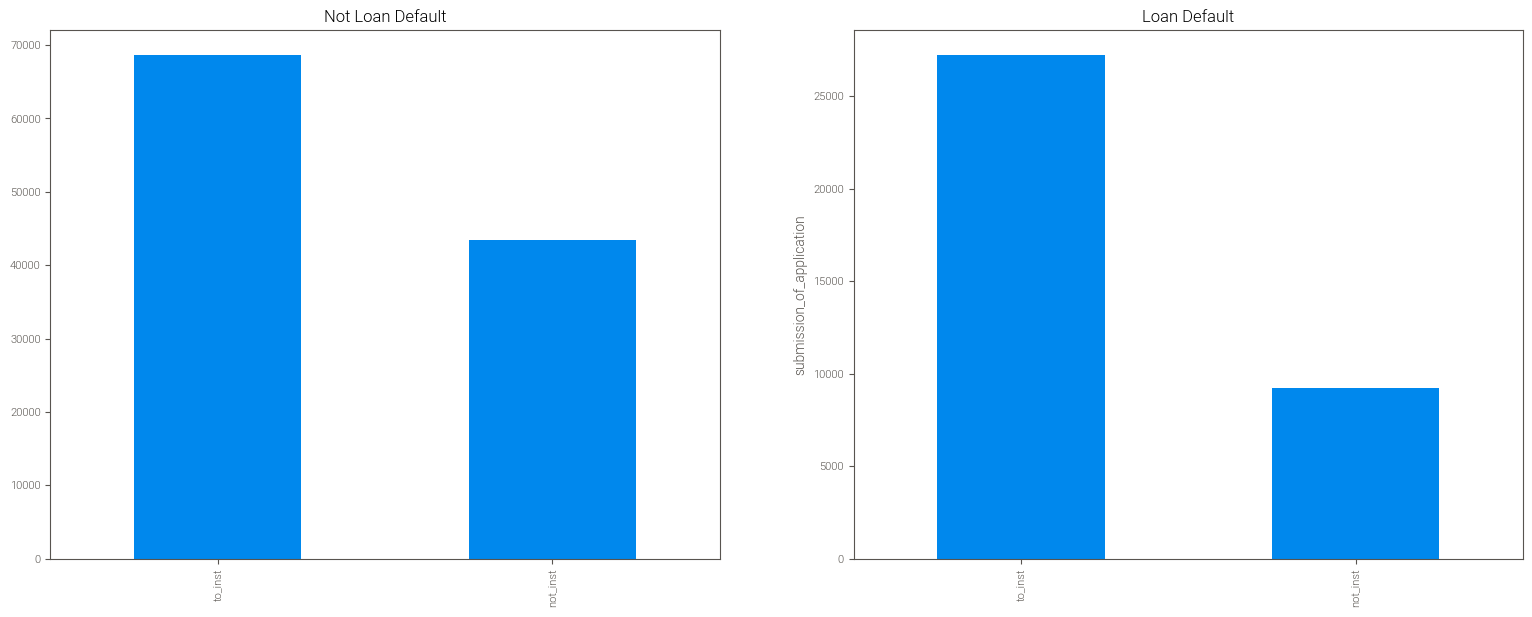

In [651]:
valuecountplot('submission_of_application')

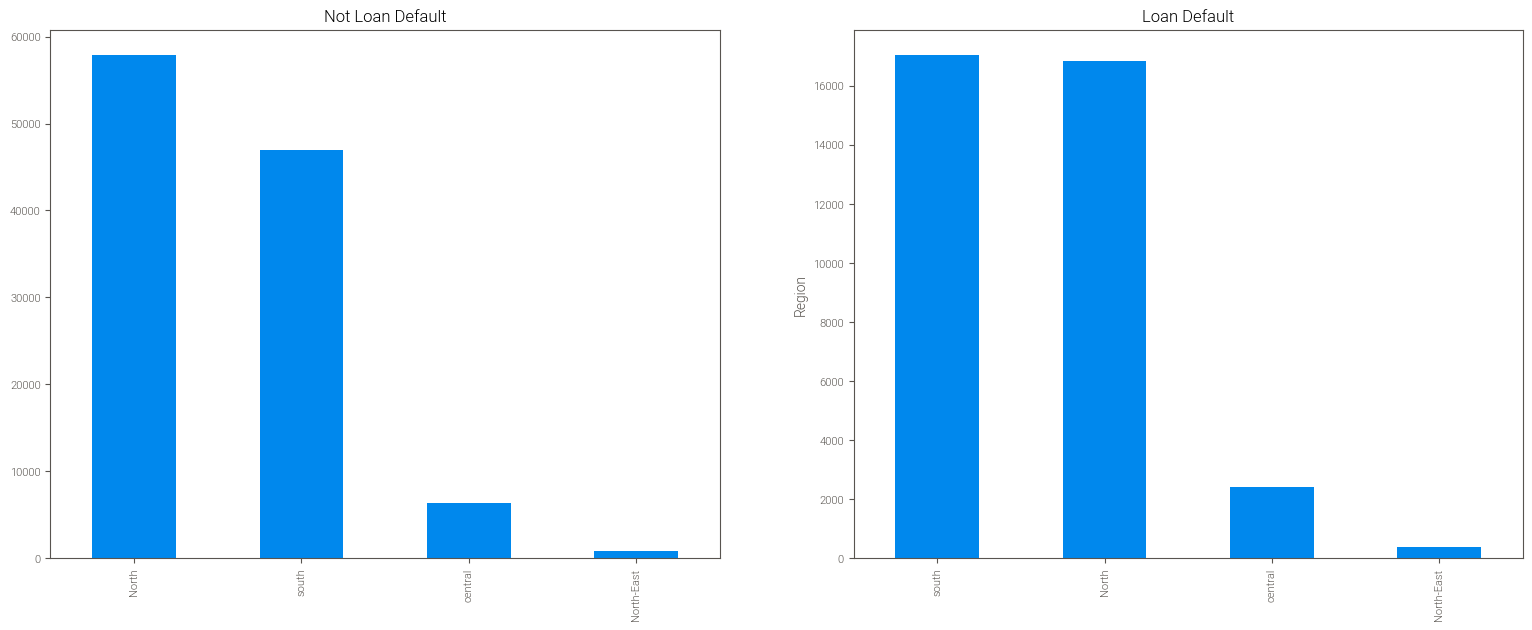

In [652]:
valuecountplot('Region')

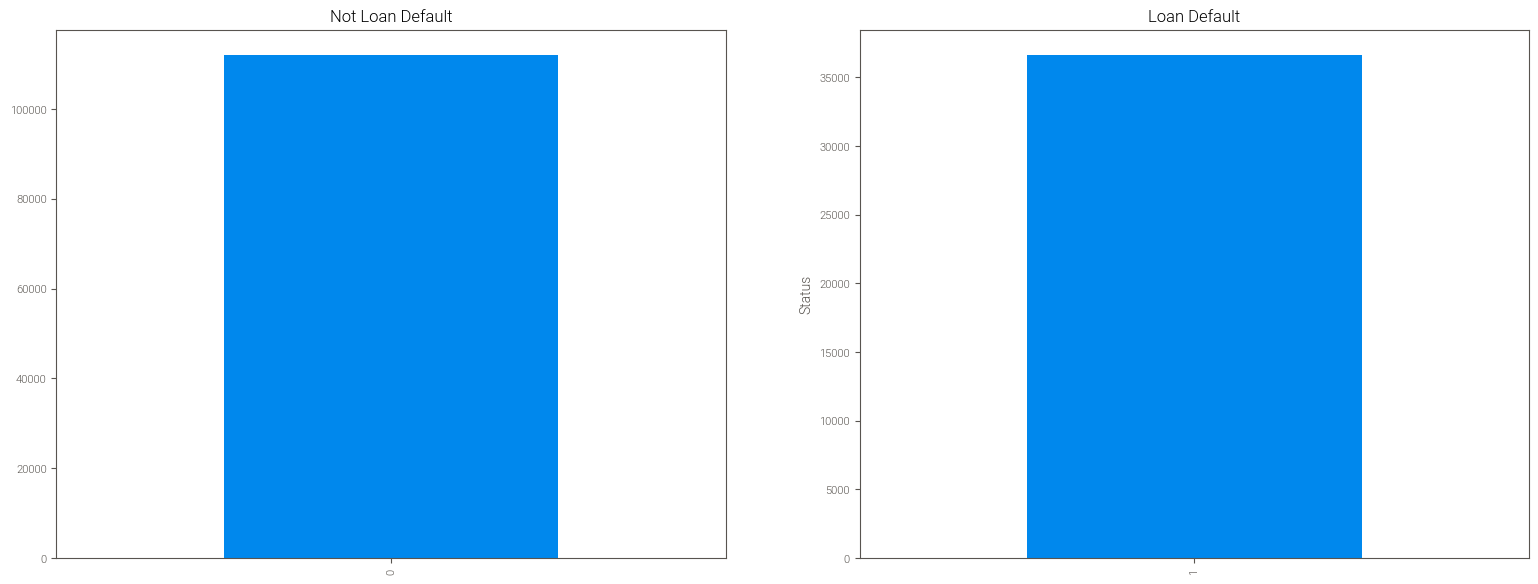

In [653]:
valuecountplot('Status')

In [654]:
report=sv.analyze(df)
report.show_html('./report.html')

                                             |                                             | [  0%]   00:00 ->…

Report ./report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [655]:
def scatterplot(dataset,feature_name_1,feature_name_2,hue_name):
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=dataset,x=feature_name_1,y=feature_name_2,hue=hue_name)
    plt.show()

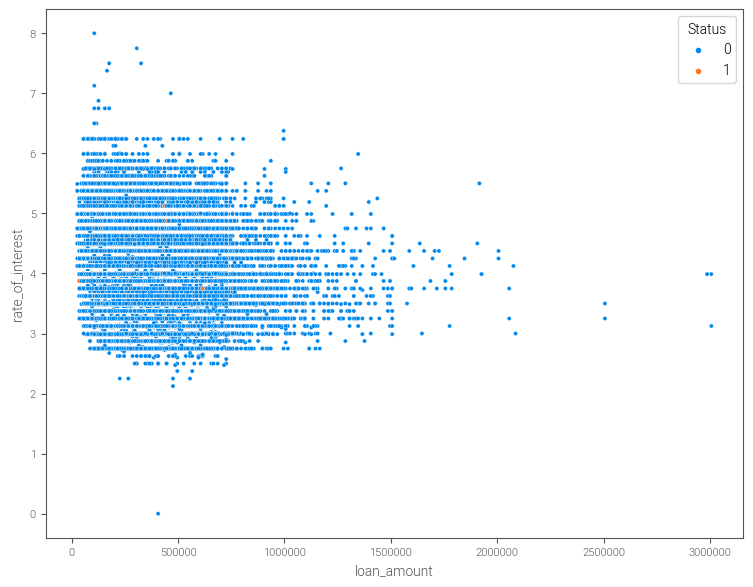

In [656]:
scatterplot(df,'loan_amount','rate_of_interest','Status')

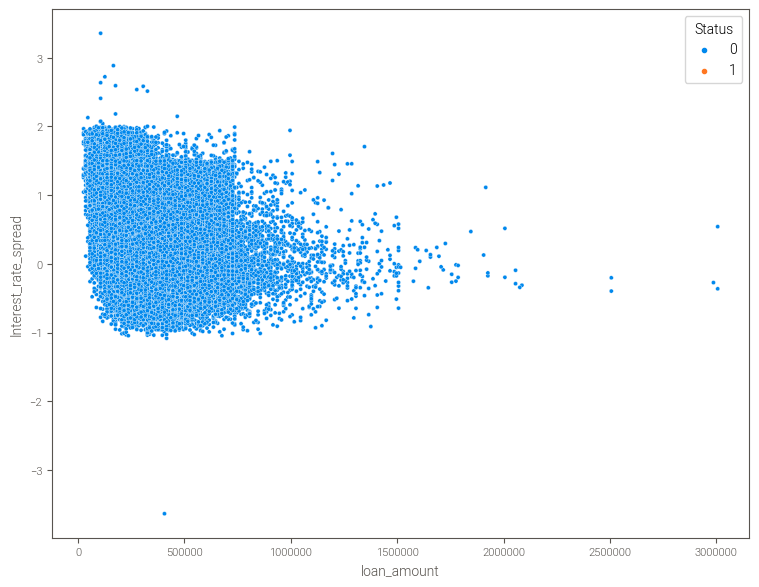

In [657]:
scatterplot(df,'loan_amount','Interest_rate_spread','Status')

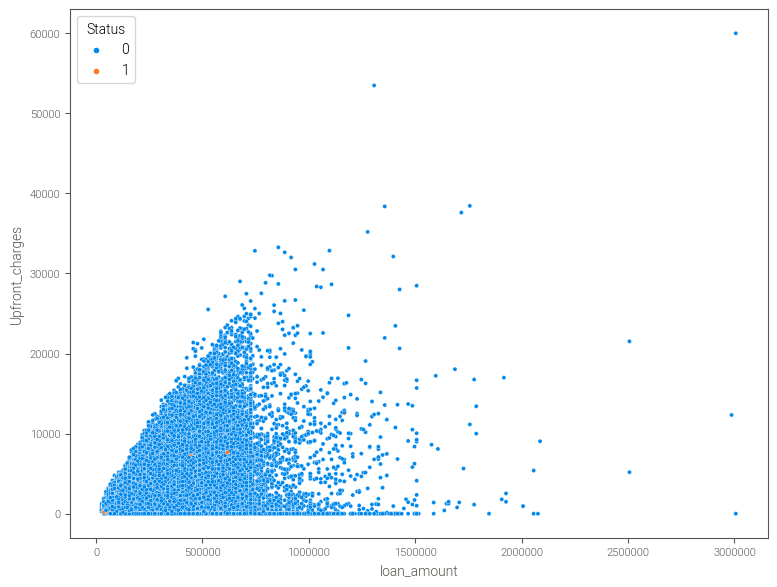

In [658]:
scatterplot(df,'loan_amount','Upfront_charges','Status')

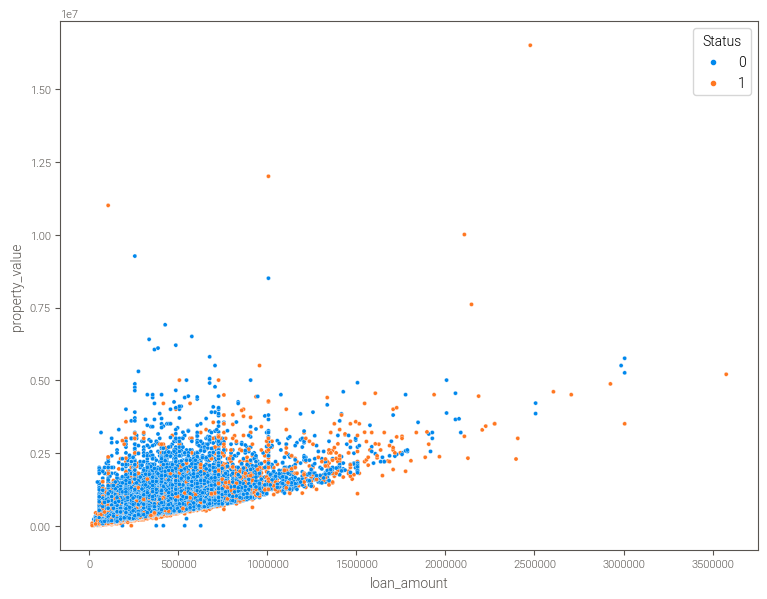

In [659]:
scatterplot(df,'loan_amount','property_value','Status')

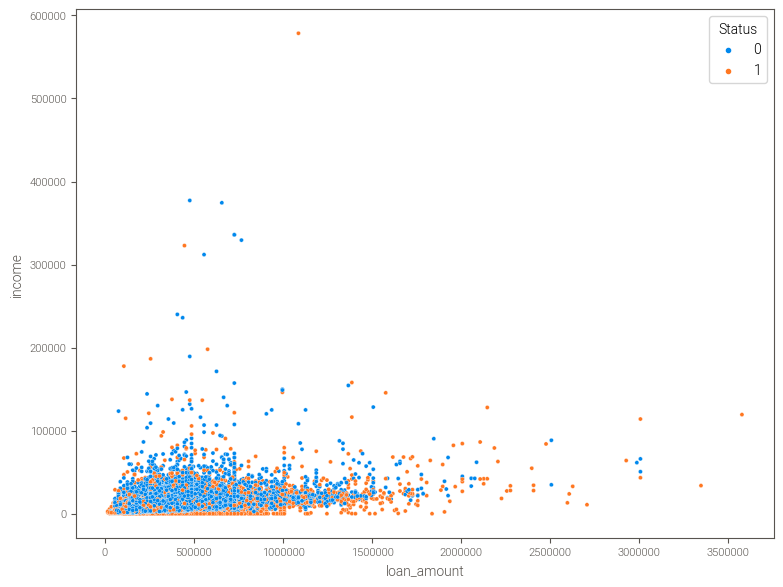

In [660]:
scatterplot(df,'loan_amount','income','Status')

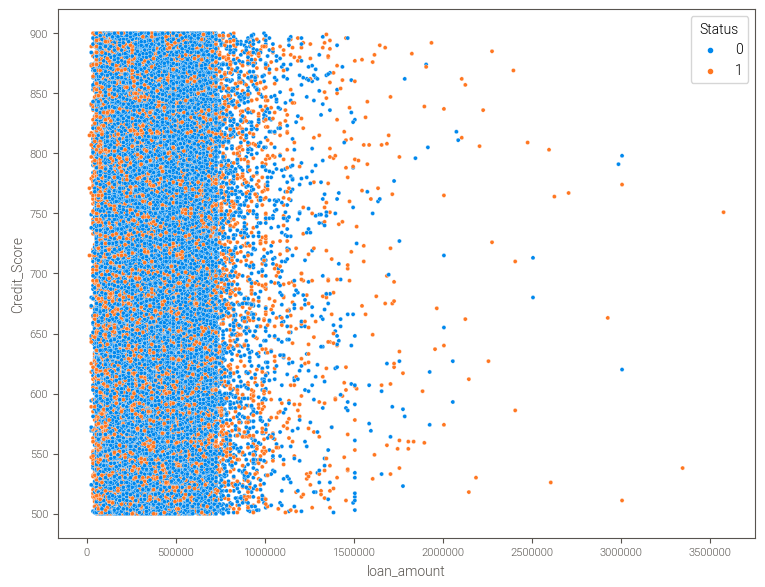

In [661]:
scatterplot(df,'loan_amount','Credit_Score','Status')

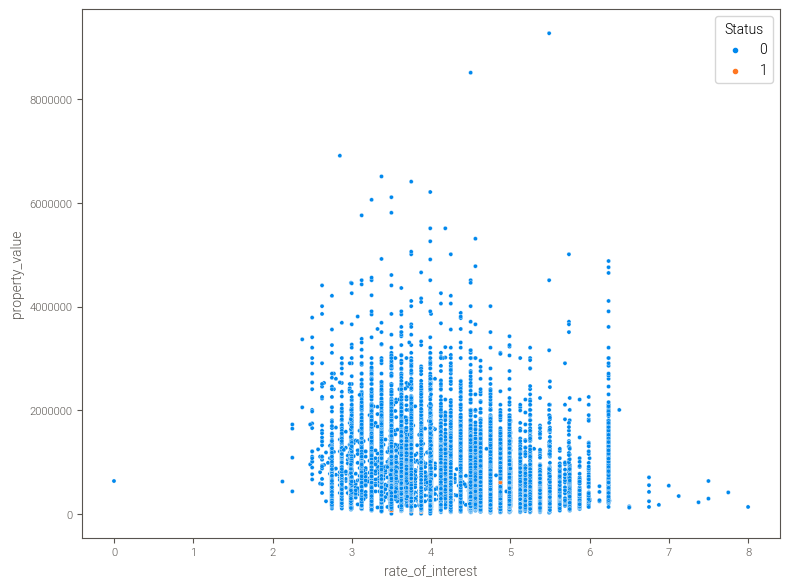

In [662]:
scatterplot(df,'rate_of_interest','property_value','Status')

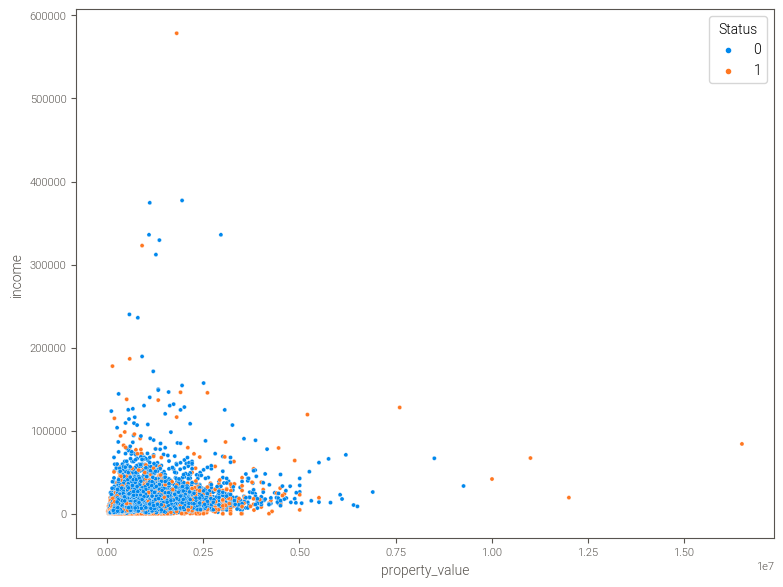

In [663]:
scatterplot(df,'property_value','income','Status')

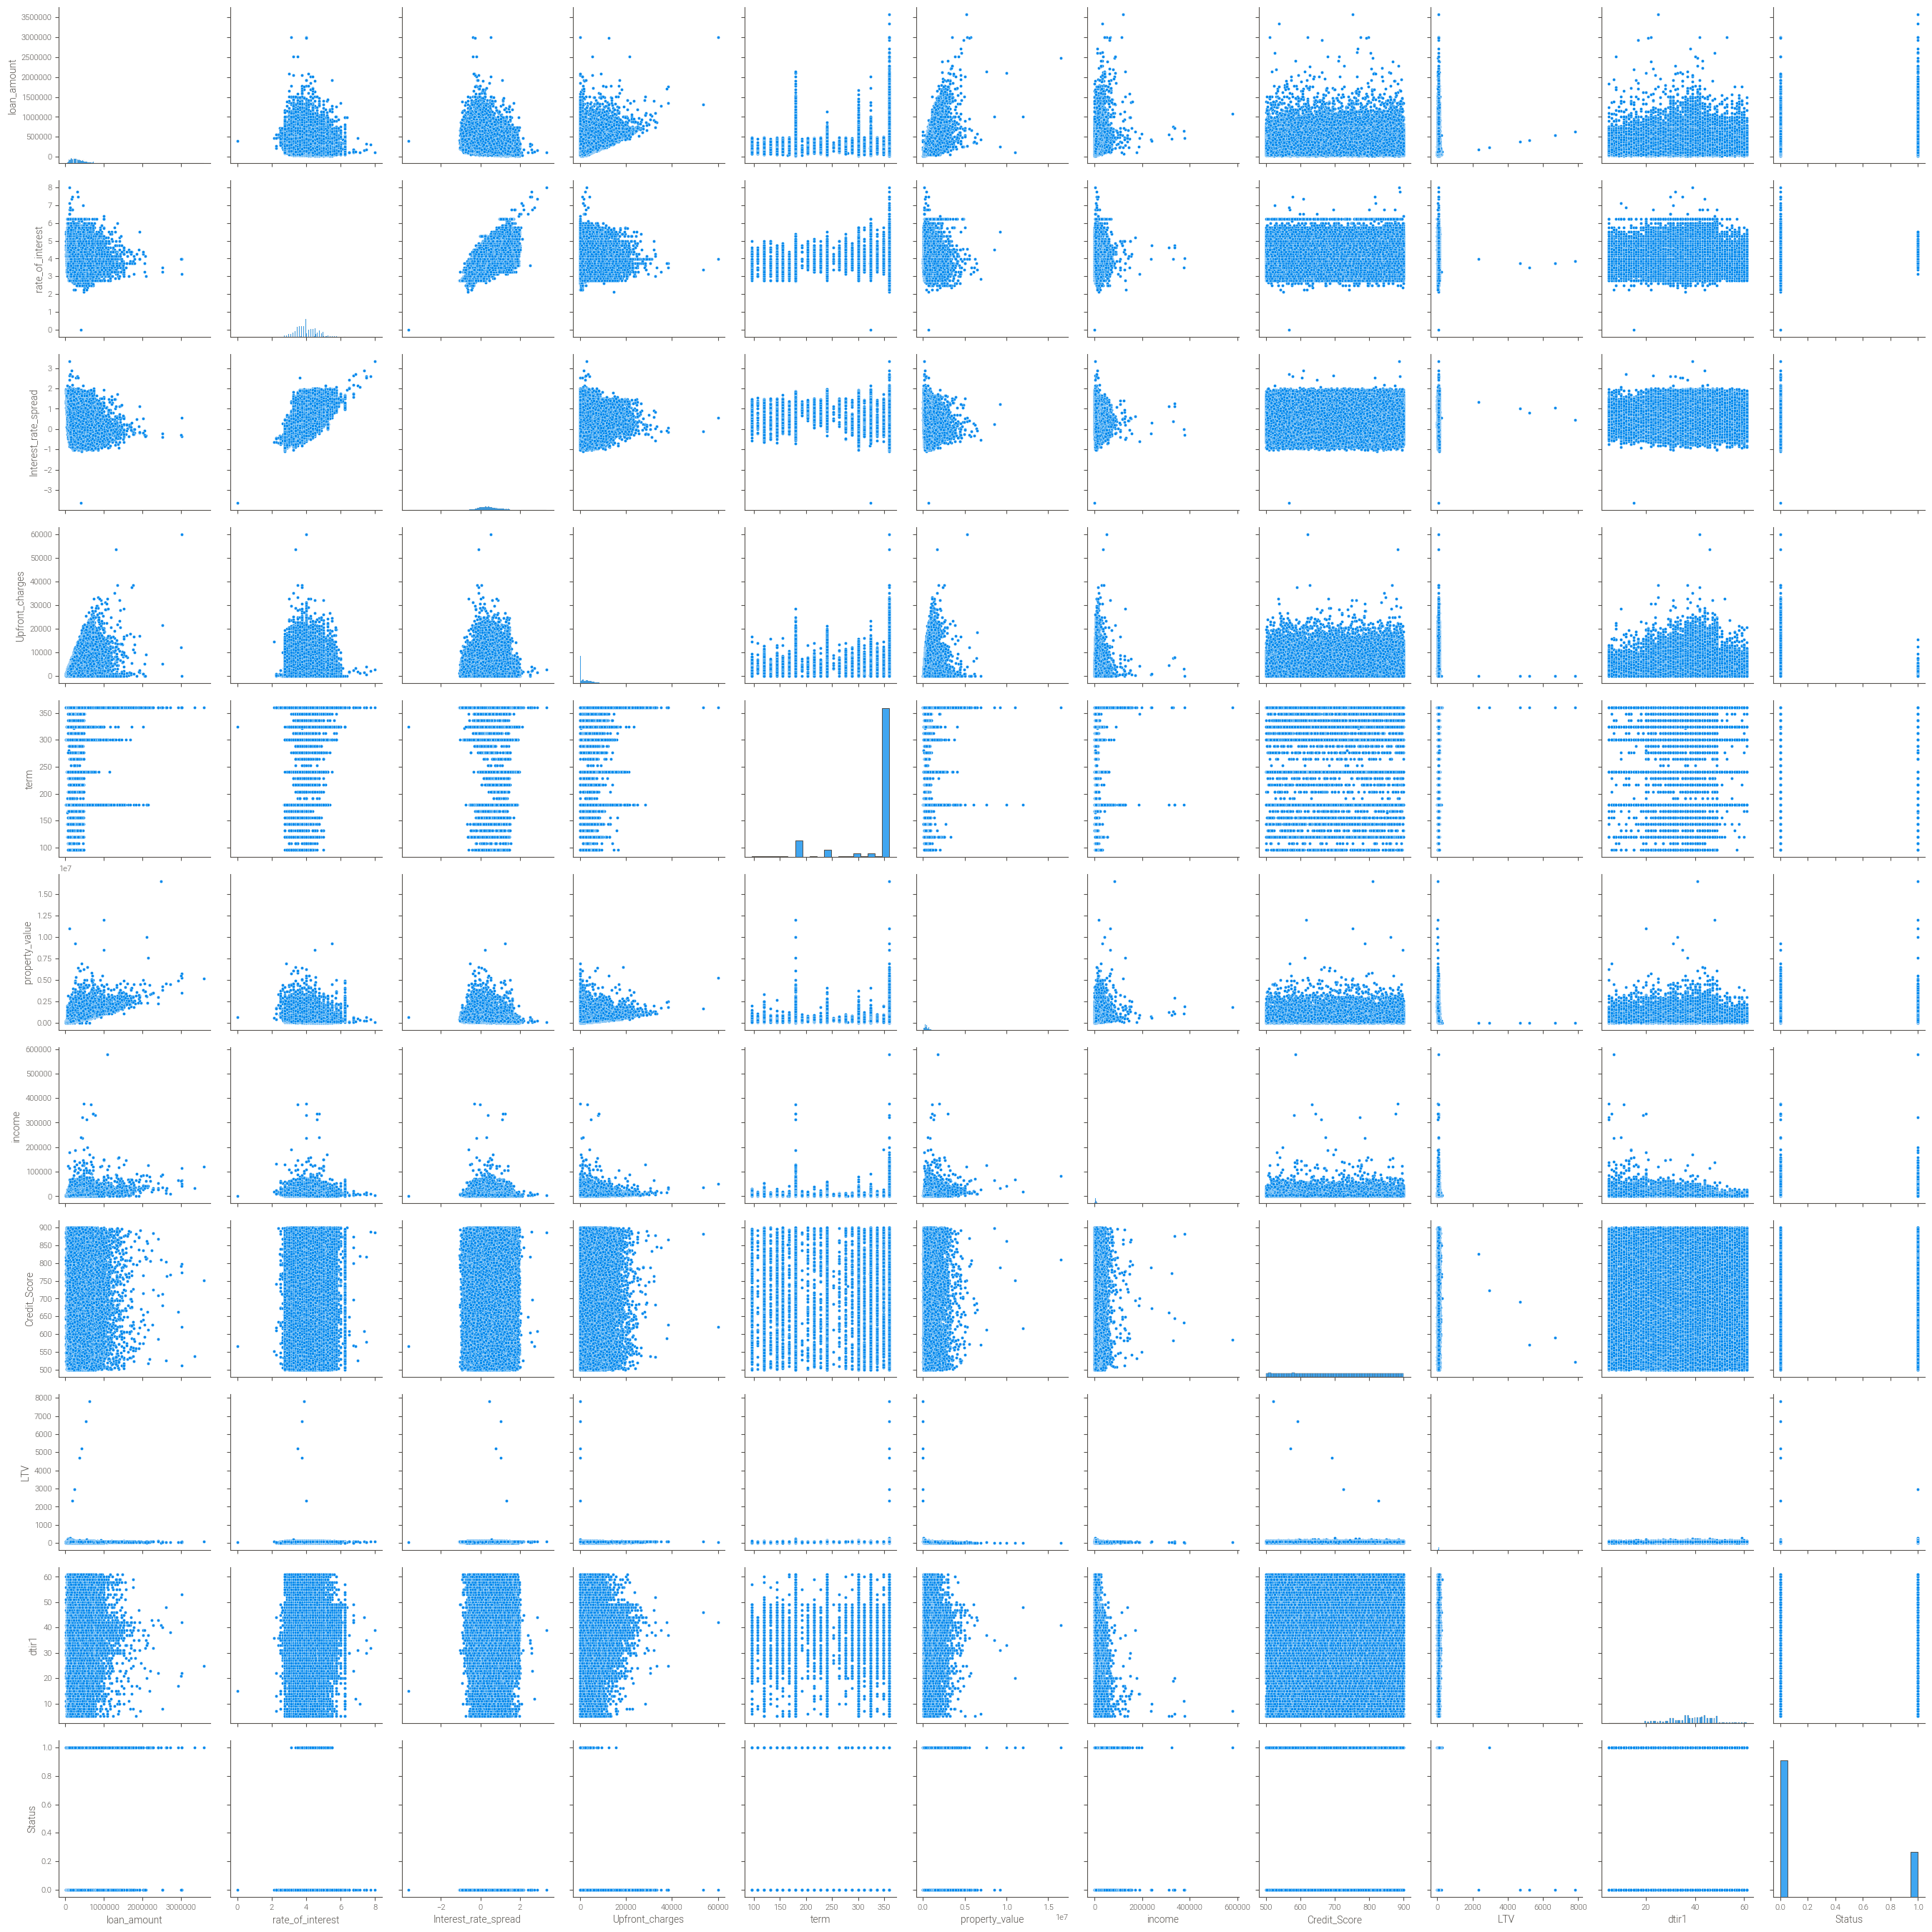

In [664]:
df3=df[numeric_features_with_target]
sns.pairplot(df3)
plt.show()

In [665]:
def count_outliers(data,col):
    q1=data[col].quantile(0.25,interpolation='nearest')
    q2=data[col].quantile(0.5,interpolation='nearest')
    q3=data[col].quantile(0.75,interpolation='nearest')
    q4=data[col].quantile(1,interpolation='nearest')
    IQR=q3-q1
    global LLP
    global ULP
    LLP=q1-1.5*IQR
    ULP=q3+1.5*IQR
    if data[col].min()>LLP and data[col].max()<ULP:
        print('No outliers in',i)
    else:
        print('There are outliers in',i)
        x=data[data[col]<LLP][col].size
        y=data[data[col]>ULP][col].size
        a.append(i)
        print('Count of outliers are:',x+y)
global a
a=[]
for i in numeric_features:
    count_outliers(df,i)

There are outliers in loan_amount
Count of outliers are: 1895
There are outliers in rate_of_interest
Count of outliers are: 856
There are outliers in Interest_rate_spread
Count of outliers are: 445
There are outliers in Upfront_charges
Count of outliers are: 2880
There are outliers in term
Count of outliers are: 26944
There are outliers in property_value
Count of outliers are: 5266
There are outliers in income
Count of outliers are: 6546
No outliers in Credit_Score
There are outliers in LTV
Count of outliers are: 1882
There are outliers in dtir1
Count of outliers are: 2013


In [666]:
cat_features=[]
for column in df.columns:
    if df[column].dtypes=='object':
        print(f'{column}:{df[column].value_counts()}')
        cat_features.append(column)

loan_limit:cf     135348
ncf      9978
Name: loan_limit, dtype: int64
Gender:Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: Gender, dtype: int64
approv_in_adv:nopre    124621
pre       23141
Name: approv_in_adv, dtype: int64
loan_type:type1    113173
type2     20762
type3     14735
Name: loan_type, dtype: int64
loan_purpose:p3    55934
p4    54799
p1    34529
p2     3274
Name: loan_purpose, dtype: int64
Credit_Worthiness:l1    142344
l2      6326
Name: Credit_Worthiness, dtype: int64
business_or_commercial:nob/c    127908
b/c       20762
Name: business_or_commercial, dtype: int64
Neg_ammortization:not_neg    133420
neg_amm     15129
Name: Neg_ammortization, dtype: int64
interest_only:not_int     141560
int_only      7110
Name: interest_only, dtype: int64
lump_sum_payment:not_lpsm    145286
lpsm          3384
Name: lump_sum_payment, dtype: int64
occupancy_type:pr    138201
ir      7340
sr      3129
Name: occupancy_type, 

In [667]:
cat_features

['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'occupancy_type',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region']

In [668]:
df.isnull().sum()

loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
occupancy_type                   0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
LTV                          15098
Region                           0
Status                           0
dtir1                        24121
dtype: int64

In [669]:
num_null=[]
for column in df.columns:
    if df[column].dtype!='object' and df[column].isnull().sum()>0:
        print(f'{column}:{df[column].isnull().sum()}')
        num_null.append(column)

rate_of_interest:36439
Interest_rate_spread:36639
Upfront_charges:39642
term:41
property_value:15098
income:9150
LTV:15098
dtir1:24121


In [670]:
num_null

['rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'LTV',
 'dtir1']

In [671]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
df[num_null]=imputer.fit_transform(df[num_null])

In [672]:
df.isnull().sum()

loan_limit                   3344
Gender                          0
approv_in_adv                 908
loan_type                       0
loan_purpose                  134
Credit_Worthiness               0
business_or_commercial          0
loan_amount                     0
rate_of_interest                0
Interest_rate_spread            0
Upfront_charges                 0
term                            0
Neg_ammortization             121
interest_only                   0
lump_sum_payment                0
property_value                  0
occupancy_type                  0
income                          0
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                           200
submission_of_application     200
LTV                             0
Region                          0
Status                          0
dtir1                           0
dtype: int64

In [673]:
cat_null=[]
for column in df.columns:
    if df[column].dtype=='object' and df[column].isnull().sum()>0:
        print(f'{column}:{df[column].isnull().sum()}')
        cat_null.append(column)

loan_limit:3344
approv_in_adv:908
loan_purpose:134
Neg_ammortization:121
age:200
submission_of_application:200


In [674]:
cat_null

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'Neg_ammortization',
 'age',
 'submission_of_application']

In [675]:
df=df.dropna(subset=cat_null)

In [676]:
df.isnull().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
occupancy_type               0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Status                       0
dtir1                        0
dtype: int64

In [677]:
df.shape

(143983, 27)

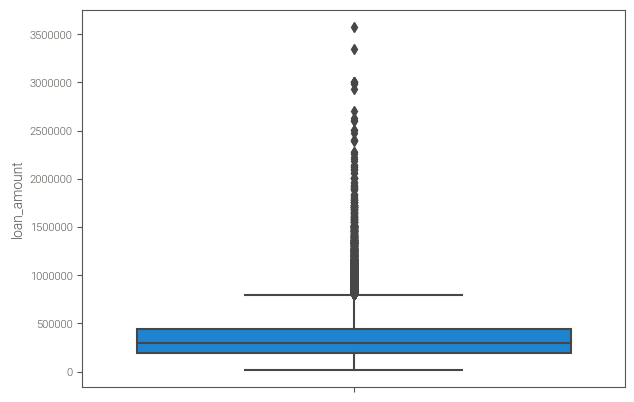

In [678]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,y='loan_amount')
plt.show()

In [679]:
df[df['loan_amount']>770000].shape

(2117, 27)

In [680]:
df.shape

(143983, 27)

In [681]:
df=df[df['loan_amount']<770000]
df.shape

(141866, 27)

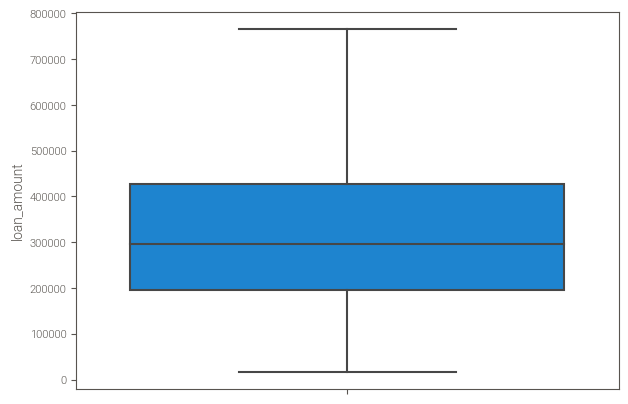

In [682]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,y='loan_amount')
plt.show()

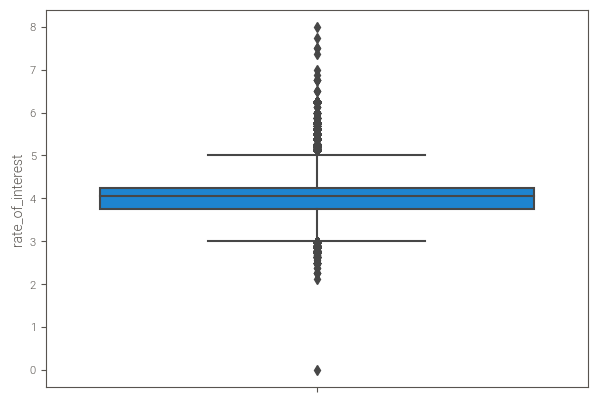

In [683]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,y='rate_of_interest')
plt.show()

In [684]:
df[df['rate_of_interest']>5.1].shape

(3514, 27)

In [685]:
df=df[df['rate_of_interest']<5.1]
df.shape

(138352, 27)

In [686]:
df[df['rate_of_interest']<3].shape

(3069, 27)

In [687]:
df=df[df['rate_of_interest']>3]
df.shape

(134684, 27)

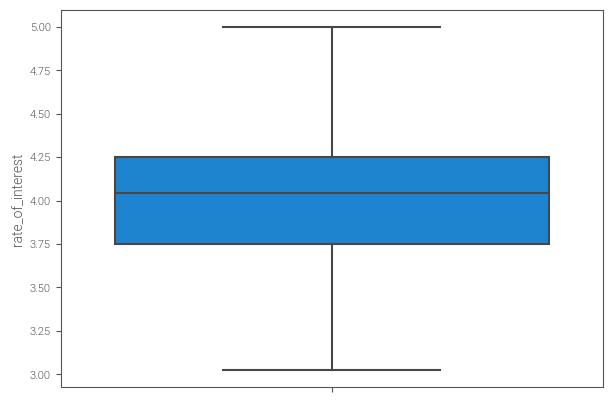

In [688]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,y='rate_of_interest')
plt.show()

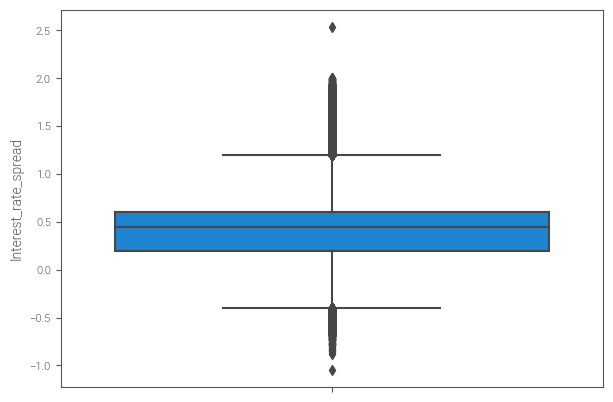

In [689]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,y='Interest_rate_spread')
plt.show()

In [690]:
df[df['Interest_rate_spread']>1.3].shape

(5826, 27)

In [691]:
df[df['Interest_rate_spread']<-0.4].shape

(1815, 27)

In [692]:
df=df[df['Interest_rate_spread']<1.3]
df.shape

(128852, 27)

In [693]:
df=df[df['Interest_rate_spread']>-0.4]
df.shape

(127036, 27)

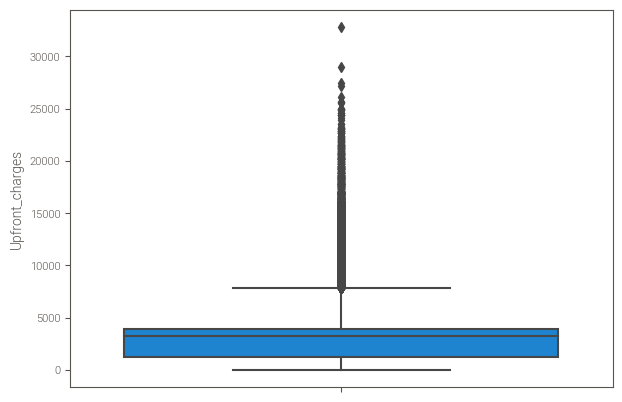

In [694]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,y='Upfront_charges')
plt.show()

In [695]:
df[df['Upfront_charges']>7500].shape

(8466, 27)

In [696]:
df=df[df['Upfront_charges']<7500]
df.shape

(118538, 27)

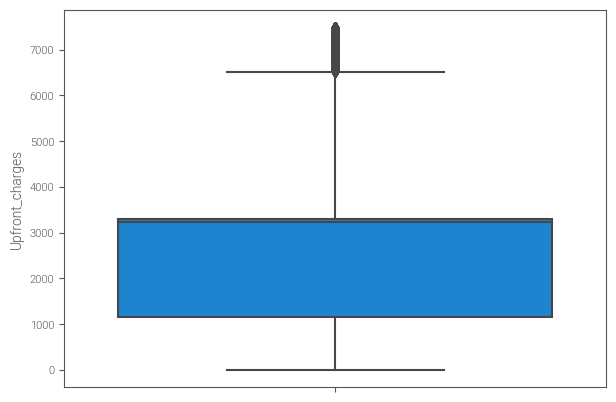

In [697]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,y='Upfront_charges')
plt.show()

In [698]:
df[df['Upfront_charges']>6500].shape

(3895, 27)

In [699]:
df=df[df['Upfront_charges']<6500]
df.shape

(114589, 27)

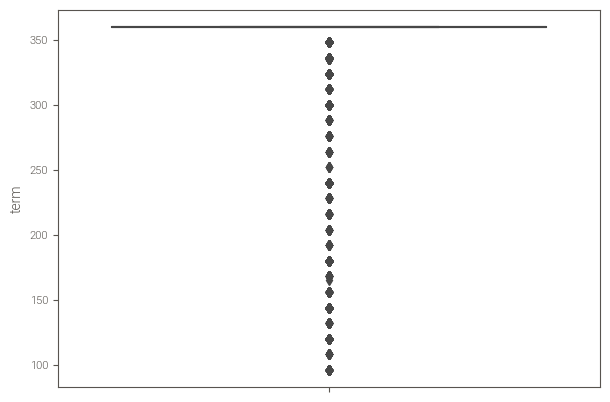

In [700]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,y='term')
plt.show()

In [701]:
df[df['term']<350].shape

(20820, 27)

In [702]:
df=df[df['term']>350]
df.shape

(93769, 27)

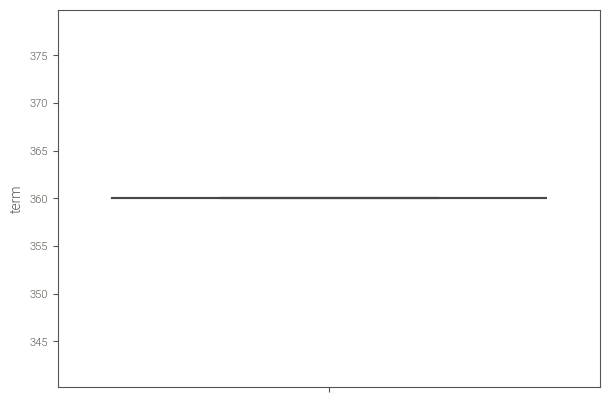

In [703]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,y='term')
plt.show()

In [704]:
df['term'].value_counts()

360.0    93769
Name: term, dtype: int64

In [705]:
df.drop('term',axis=1,inplace=True)

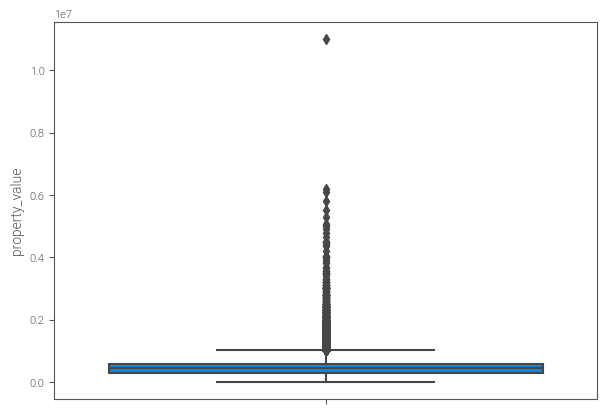

In [706]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,y='property_value')
plt.show()

In [707]:
df['property_value'].mean()

487029.642163735

In [708]:
df[df['property_value']>1000000].shape

(3717, 26)

In [709]:
df=df[df['property_value']<1000000]
df.shape

(90052, 26)

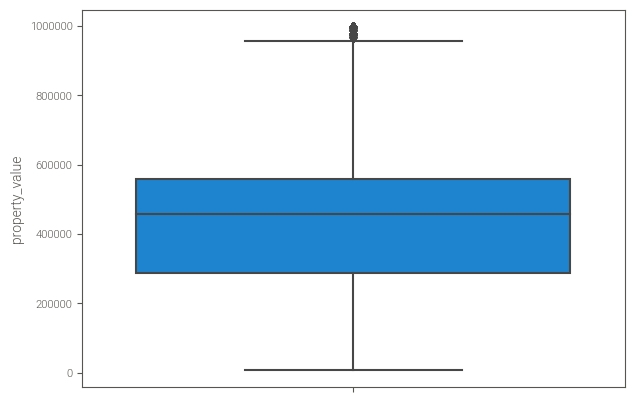

In [710]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,y='property_value')
plt.show()

In [711]:
df[df['property_value']>970000].shape

(801, 26)

In [712]:
df=df[df['property_value']<970000]

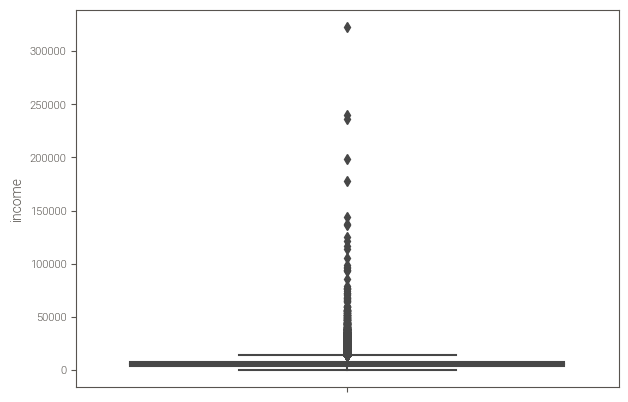

In [713]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,y='income')
plt.show()

In [714]:
df[df['income']>15000].shape

(2835, 26)

In [715]:
df=df[df['income']<15000]
df.shape

(86346, 26)

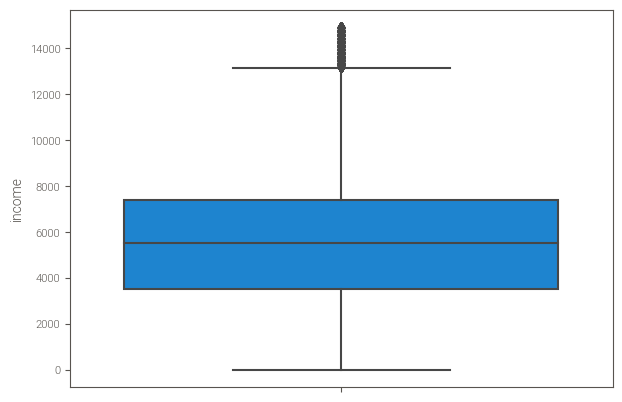

In [716]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,y='income')
plt.show()

In [717]:
df[df['income']>13000].shape

(1874, 26)

In [718]:
df=df[df['income']<13000]
df.shape

(84472, 26)

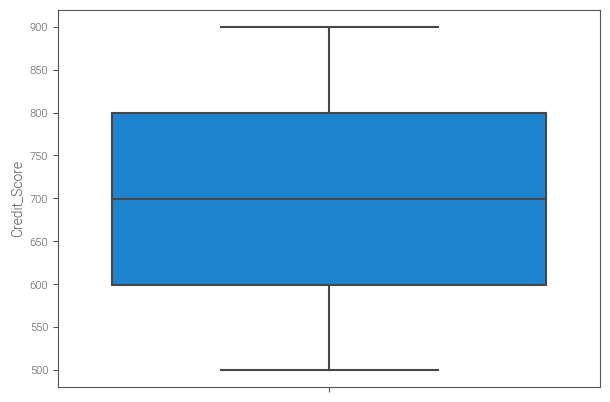

In [719]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,y='Credit_Score')
plt.show()

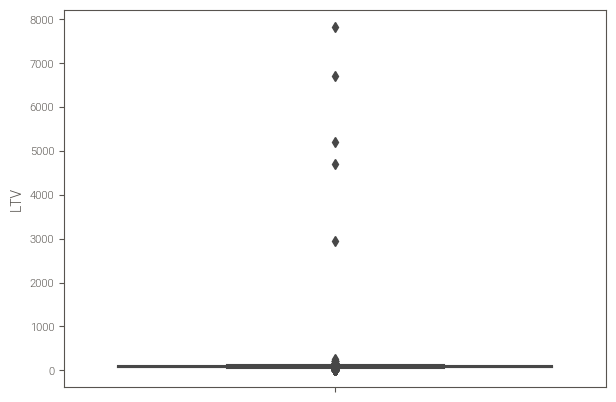

In [720]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,y='LTV')
plt.show()

In [721]:
df[df['LTV']>200].shape

(14, 26)

In [722]:
df=df[df['LTV']<200]
df.shape

(84458, 26)

In [723]:
df[df['LTV']<20].shape

(254, 26)

In [724]:
df=df[df['LTV']>20]
df.shape

(84204, 26)

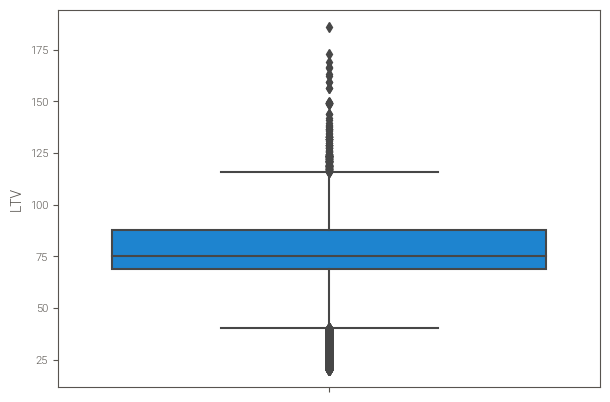

In [725]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,y='LTV')
plt.show()

In [726]:
df[df['LTV']>110].shape

(300, 26)

In [727]:
df=df[df['LTV']<110]
df.shape

(83904, 26)

In [728]:
df[df['LTV']<38].shape

(1995, 26)

In [729]:
df=df[df['LTV']>38]
df.shape

(81909, 26)

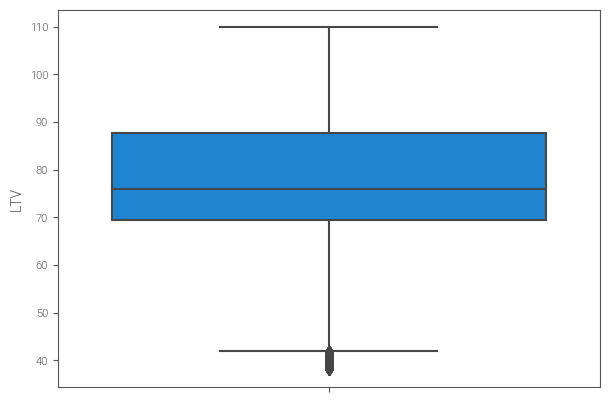

In [730]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,y='LTV')
plt.show()

In [731]:
df[df['LTV']<44].shape

(1499, 26)

In [732]:
df=df[df['LTV']>44]
df.shape

(80410, 26)

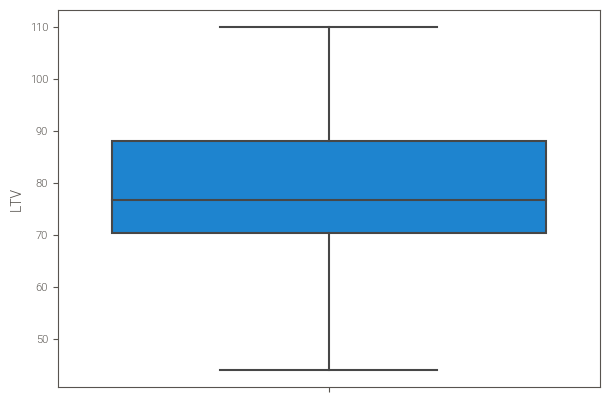

In [733]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,y='LTV')
plt.show()

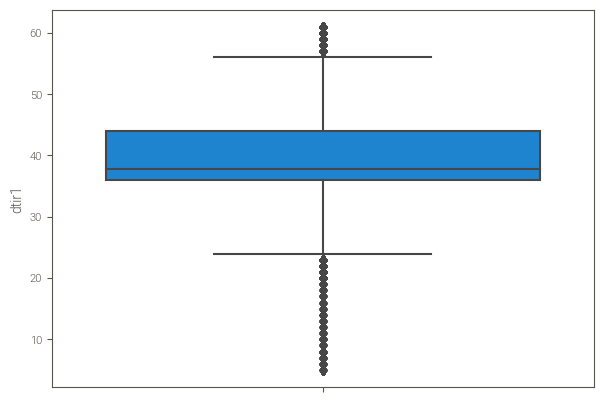

In [734]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,y='dtir1')
plt.show()

In [735]:
df[df['dtir1']>56].shape

(2523, 26)

In [736]:
df=df[df['dtir1']<56]
df.shape

(77428, 26)

In [737]:
df[df['dtir1']<24].shape

(5317, 26)

In [738]:
df=df[df['dtir1']>24]
df.shape

(71319, 26)

In [739]:
df.head()

loan_limit             Gender approv_in_adv loan_type loan_purpose  \
0         cf  Sex Not Available         nopre     type1           p1   
1         cf               Male         nopre     type2           p1   
2         cf               Male           pre     type1           p1   
3         cf               Male         nopre     type1           p4   
4         cf              Joint           pre     type1           p1   

  Credit_Worthiness business_or_commercial  loan_amount  rate_of_interest  \
0                l1                  nob/c       116500          4.045476   
1                l1                    b/c       206500          4.045476   
2                l1                  nob/c       406500          4.560000   
3                l1                  nob/c       456500          4.250000   
4                l1                  nob/c       696500          4.000000   

   Interest_rate_spread  ...   income credit_type Credit_Score  \
0              0.441656  ...   1740.0         EXP          758   
1              0.441656  ...   4980.0        EQUI          552   
2              0.200000  ...   9480.0         EXP          834   
3              0.681000  ...  11880.0         EXP          587   
4              0.304200  ...  10440.0        CRIF          602   

  co-applicant_credit_type    age submission_of_application        LTV Region  \
0                      CIB  25-34                   to_inst  98.728814  south   
1                      EXP  55-64                   to_inst  72.746457  North   
2                      CIB  35-44                   to_inst  80.019685  south   
3                      CIB  45-54                  not_inst  69.376900  North   
4                      EXP  25-34                  not_inst  91.886544  North   

   Status      dtir1  
0       1  45.000000  
1       1  37.732932  
2       0  46.000000  
3       0  42.000000  
4       0  39.000000  

[5 rows x 26 columns]

In [740]:
cat_features

['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'occupancy_type',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region']

In [741]:
df=pd.get_dummies(data=df,columns=cat_features,drop_first=True)
df.head()

loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
0       116500          4.045476              0.441656      3224.996127   
1       206500          4.045476              0.441656      3224.996127   
2       406500          4.560000              0.200000       595.000000   
3       456500          4.250000              0.681000      3224.996127   
4       696500          4.000000              0.304200         0.000000   

   property_value   income  Credit_Score        LTV  Status      dtir1  ...  \
0   118000.000000   1740.0           758  98.728814       1  45.000000  ...   
1   497893.465696   4980.0           552  72.746457       1  37.732932  ...   
2   508000.000000   9480.0           834  80.019685       0  46.000000  ...   
3   658000.000000  11880.0           587  69.376900       0  42.000000  ...   
4   758000.000000  10440.0           602  91.886544       0  39.000000  ...   

   age_35-44  age_45-54  age_55-64  age_65-74  age_<25  age_>74  \
0          0          0          0          0        0        0   
1          0          0          1          0        0        0   
2          1          0          0          0        0        0   
3          0          1          0          0        0        0   
4          0          0          0          0        0        0   

   submission_of_application_to_inst  Region_North-East  Region_central  \
0                                  1                  0               0   
1                                  1                  0               0   
2                                  1                  0               0   
3                                  0                  0               0   
4                                  0                  0               0   

   Region_south  
0             1  
1             0  
2             1  
3             0  
4             0  

[5 rows x 41 columns]

In [742]:
df.shape

(71319, 41)

In [743]:
df['Status'].value_counts()

0    49698
1    21621
Name: Status, dtype: int64

In [744]:
X=df.drop('Status',axis=1)
y=df['Status']

In [745]:
X

loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
0            116500          4.045476              0.441656      3224.996127   
1            206500          4.045476              0.441656      3224.996127   
2            406500          4.560000              0.200000       595.000000   
3            456500          4.250000              0.681000      3224.996127   
4            696500          4.000000              0.304200         0.000000   
...             ...               ...                   ...              ...   
148656       226500          4.990000              1.210600         0.000000   
148658       386500          4.045476              0.441656      3224.996127   
148659       416500          4.375000              0.023000      5687.910000   
148661       346500          4.045476              0.441656      3224.996127   
148663       106500          4.045476              0.441656      3224.996127   

        property_value        income  Credit_Score        LTV      dtir1  \
0        118000.000000   1740.000000           758  98.728814  45.000000   
1        497893.465696   4980.000000           552  72.746457  37.732932   
2        508000.000000   9480.000000           834  80.019685  46.000000   
3        658000.000000  11880.000000           587  69.376900  42.000000   
4        758000.000000  10440.000000           602  91.886544  39.000000   
...                ...           ...           ...        ...        ...   
148656   268000.000000   3120.000000           665  84.514925  51.000000   
148658   497893.465696   4680.000000           669  72.746457  37.732932   
148659   608000.000000   4080.000000           520  68.503289  40.000000   
148661   358000.000000   6957.338876           585  96.787710  37.732932   
148663   497893.465696   1860.000000           619  72.746457  37.732932   

        loan_limit_ncf  ...  age_35-44  age_45-54  age_55-64  age_65-74  \
0                    0  ...          0          0          0          0   
1                    0  ...          0          0          1          0   
2                    0  ...          1          0          0          0   
3                    0  ...          0          1          0          0   
4                    0  ...          0          0          0          0   
...                ...  ...        ...        ...        ...        ...   
148656               0  ...          0          1          0          0   
148658               0  ...          0          0          0          0   
148659               0  ...          0          0          0          1   
148661               0  ...          0          0          0          0   
148663               0  ...          0          0          0          0   

        age_<25  age_>74  submission_of_application_to_inst  \
0             0        0                                  1   
1             0        0                                  1   
2             0        0                                  1   
3             0        0                                  0   
4             0        0                                  0   
...         ...      ...                                ...   
148656        0        0                                  1   
148658        0        0                                  1   
148659        0        0                                  1   
148661        0        0                                  1   
148663        1        0                                  1   

        Region_North-East  Region_central  Region_south  
0                       0               0             1  
1                       0               0             0  
2                       0               0             1  
3                       0               0             0  
4                       0               0             0  
...                   ...             ...           ...  
148656                  0               0             1  
148658      

In [746]:
y

0         1
1         1
2         0
3         0
4         0
         ..
148656    0
148658    1
148659    0
148661    1
148663    1
Name: Status, Length: 71319, dtype: int64

In [747]:
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)

In [748]:
X_sm.shape

(99396, 40)

In [749]:
y_sm.value_counts()

1    49698
0    49698
Name: Status, dtype: int64

In [750]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_sm)

In [751]:
X_scaled

array([[-1.33292365, -0.04760636,  0.09544564, ..., -0.07954727,
        -0.2140101 ,  1.34829746],
       [-0.73651668, -0.04760636,  0.09544564, ..., -0.07954727,
        -0.2140101 , -0.7416761 ],
       [ 0.58883214,  1.56324299, -0.76282653, ..., -0.07954727,
        -0.2140101 ,  1.34829746],
       ...,
       [ 2.70939025, -0.04760636,  0.09544564, ..., -0.07954727,
        -0.2140101 , -0.7416761 ],
       [-0.47144691, -0.04760636,  0.09544564, ..., -0.07954727,
        -0.2140101 ,  1.34829746],
       [ 2.04671584, -0.04760636,  0.09544564, ..., -0.07954727,
        -0.2140101 ,  1.34829746]])

In [752]:
X_sm.std().mean()

8329.747741392657

In [753]:
X_scaled.std().mean()

1.0000000000000002

In [754]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_sm,test_size=0.2,random_state=42,stratify=y_sm)

In [755]:
X_train.shape

(79516, 40)

In [756]:
X_test.shape

(19880, 40)

In [757]:
y_train.value_counts()

1    39758
0    39758
Name: Status, dtype: int64

In [758]:
y_test.value_counts()

0    9940
1    9940
Name: Status, dtype: int64

In [759]:
model=DecisionTreeClassifier()

In [760]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [761]:
y_predict=model.predict(X_test)
y_predict[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [762]:
y_test[:5]

45292    0
76280    1
44416    1
24121    0
34927    1
Name: Status, dtype: int64

In [763]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9940
           1       1.00      1.00      1.00      9940

    accuracy                           1.00     19880
   macro avg       1.00      1.00      1.00     19880
weighted avg       1.00      1.00      1.00     19880



In [766]:
cm=confusion_matrix(y_predict,y_test)
cm

array([[9940,    0],
       [   0, 9940]], dtype=int64)

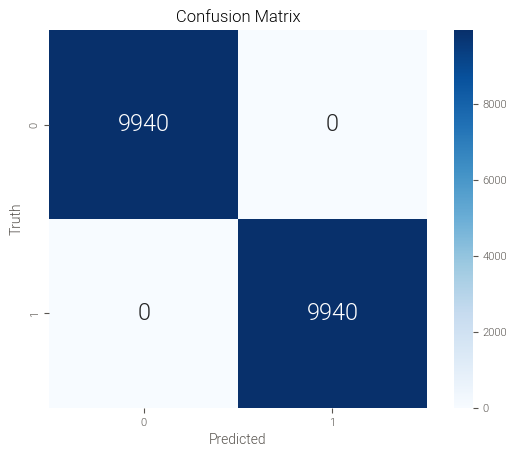

In [767]:
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True,square=True,cbar=True,annot_kws={'size':17},fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()